To do:
- Super cup

In [809]:
import pandas as pd

In [584]:
df = pd.read_csv('data/matches.csv')

In [585]:
df['city'] = df['location'].apply(lambda x: x.split(',')[-1].split('(')[0].strip() if isinstance(x, str) else x)

In [586]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')

## Let's count the remaining teams for every stage/season/cup

In [587]:
compdates = df[['season','competition','date','homeTeam','awayTeam','phase']]

In [588]:
compdates

,season,competition,date,homeTeam,awayTeam,phase
0,1965-66,CWC,1966-04-14,Celtic,Liverpool,semi-finals
1,1955-58,ICFC,1955-06-04,Basel XI,London XI,group stage
2,1955-56,UCL,1955-09-04,Sporting CP,Partizan,first round
3,1955-56,UCL,1955-09-07,Vörös Lobogó,Anderlecht,first round
4,1955-56,UCL,1955-09-08,Servette,Real Madrid,first round
...,...,...,...,...,...,...
27175,2024-25,UECL,2024-08-15,Zrinjski Mostar,Botev Plovdiv,third qualifying round
27176,2024-25,UECL,2024-08-15,Baník Ostrava,Copenhagen,third qualifying round
27177,2024-25,EL,2024-08-15,Viktoria Plzeň,Kryvbas Kryvyi Rih,third qualifying round
27178,1965-66,UCL,NaT,Derry City,Anderlecht,first round


In [589]:
first_match = pd.DataFrame(compdates.groupby(['season','competition','phase'])['date'].min()).reset_index()
first_match

,season,competition,phase,date
0,1955-56,UCL,final,1956-06-13
1,1955-56,UCL,first round,1955-09-04
2,1955-56,UCL,quarter-finals,1955-11-23
3,1955-56,UCL,semi-finals,1956-04-04
4,1955-58,ICFC,group stage,1955-06-04
...,...,...,...,...
1175,2024-25,UCL,second qualifying round,2024-07-23
1176,2024-25,UCL,third qualifying round,2024-08-06
1177,2024-25,UECL,first qualifying round,2024-07-10
1178,2024-25,UECL,second qualifying round,2024-07-23


In [590]:
def remaining_phases(row):
    return df[(df['date'] >= row['date']) & (df['competition'] == row['competition']) & (df['season'] == row['season'])]['phase'].drop_duplicates().to_list()

In [591]:
first_match['remaining_phases'] = first_match.apply(lambda x: remaining_phases(x), axis=1)

In [592]:
first_match

,season,competition,phase,date,remaining_phases
0,1955-56,UCL,final,1956-06-13,[final]
1,1955-56,UCL,first round,1955-09-04,"[first round, quarter-finals, semi-finals, final]"
2,1955-56,UCL,quarter-finals,1955-11-23,"[first round, quarter-finals, semi-finals, final]"
3,1955-56,UCL,semi-finals,1956-04-04,"[semi-finals, final]"
4,1955-58,ICFC,group stage,1955-06-04,"[group stage, knockout stage]"
...,...,...,...,...,...
1175,2024-25,UCL,second qualifying round,2024-07-23,"[second qualifying round, third qualifying round]"
1176,2024-25,UCL,third qualifying round,2024-08-06,[third qualifying round]
1177,2024-25,UECL,first qualifying round,2024-07-10,"[first qualifying round, second qualifying rou..."
1178,2024-25,UECL,second qualifying round,2024-07-23,"[second qualifying round, third qualifying round]"


In [593]:
def remaining_teams(row):
    rem_phases = row['remaining_phases']
    remaining_teams = []
    for r in rem_phases:
        ht = df[(df['competition'] == row['competition']) & (df['season'] == row['season']) & (df['phase'] == r)]['homeTeam'].drop_duplicates().to_list()
        at = df[(df['competition'] == row['competition']) & (df['season'] == row['season']) & (df['phase'] == r)]['awayTeam'].drop_duplicates().to_list()
        remaining_teams = remaining_teams + ht + at
    return list(set(remaining_teams))

In [594]:
first_match['remaining_teams'] = first_match.apply(lambda x: remaining_teams(x), axis=1)

In [595]:
first_match.sample(20)

,season,competition,phase,date,remaining_phases,remaining_teams
54,1962-63,CWC,final,1963-05-15,[final],"[Atlético Madrid, Tottenham Hotspur]"
900,2010-11,UCL,third qualifying round,2010-07-27,"[third qualifying round, play-off round, group...","[PAOK, Fenerbahçe, AIK, Panathinaikos, Omonia,..."
82,1963-64,UCL,semi-finals,1964-04-15,"[semi-finals, final]","[Zürich, Borussia Dortmund, Inter Milan, Real ..."
965,2014-15,UCL,first qualifying round,2014-07-01,"[first qualifying round, second qualifying rou...","[Cliftonville, Žalgiris Vilnius, Liverpool, Ve..."
1021,2017-18,UCL,first qualifying round,2017-06-27,"[first qualifying round, second qualifying rou...","[İstanbul Başakşehir, Žalgiris Vilnius, Liverp..."
1132,2022-23,UCL,third qualifying round,2022-08-02,"[third qualifying round, play-off round, group...","[Red Star Belgrade, Bayer Leverkusen, Marseill..."
920,2012-13,EL,play-off round,2012-08-22,"[play-off round, groups, round of 32, round of...","[Mura 05, Red Star Belgrade, PAOK, Helsingborg..."
1085,2020-21,UCL,play-off round,2020-09-22,"[play-off round, groups, round of 16, quarter-...","[PAOK, İstanbul Başakşehir, Krasnodar, Omonia,..."
553,1993-94,CWC,first round,1993-09-14,"[first round, second round, quarter-finals, se...","[Bayer Leverkusen, Universitatea Craiova, Pana..."
509,1990-91,CWC,final,1991-05-15,[final],"[Manchester United, Barcelona]"


In [596]:
first_match['remaining_teams_count'] = first_match['remaining_teams'].apply(lambda x: len(x))

In [597]:
first_match

,season,competition,phase,date,remaining_phases,remaining_teams,remaining_teams_count
0,1955-56,UCL,final,1956-06-13,[final],"[Real Madrid, Reims]",2
1,1955-56,UCL,first round,1955-09-04,"[first round, quarter-finals, semi-finals, final]","[Vörös Lobogó, Djurgården, Hibernian, Real Mad...",16
2,1955-56,UCL,quarter-finals,1955-11-23,"[first round, quarter-finals, semi-finals, final]","[Vörös Lobogó, Djurgården, Hibernian, Real Mad...",16
3,1955-56,UCL,semi-finals,1956-04-04,"[semi-finals, final]","[Hibernian, Real Madrid, Milan, Reims]",4
4,1955-58,ICFC,group stage,1955-06-04,"[group stage, knockout stage]","[Lausanne-Sport, Frankfurt XI, Leipzig XI, Int...",10
...,...,...,...,...,...,...,...
1175,2024-25,UCL,second qualifying round,2024-07-23,"[second qualifying round, third qualifying round]","[PAOK, Fenerbahçe, Jagiellonia Białystok, RFS,...",34
1176,2024-25,UCL,third qualifying round,2024-08-06,[third qualifying round],"[PAOK, Fenerbahçe, Jagiellonia Białystok, Dyna...",20
1177,2024-25,UECL,first qualifying round,2024-07-10,"[first qualifying round, second qualifying rou...","[İstanbul Başakşehir, Cliftonville, Djurgården...",135
1178,2024-25,UECL,second qualifying round,2024-07-23,"[second qualifying round, third qualifying round]","[İstanbul Başakşehir, Cliftonville, Djurgården...",110


In [598]:
df = df.merge(first_match[['competition','season','phase','remaining_teams_count']], on=['competition','season','phase'], how='outer')

In [599]:
df.loc[df['season'] == '2024-25', 'remaining_teams_count'] = None

In [600]:
df.loc[df['homeTeamUrl'] == 'Bohemian_F.C.', 'homeTeam'] = 'Bohemian_F.C.'
df.loc[df['awayTeamUrl'] == 'Bohemian_F.C.', 'awayTeam'] = 'Bohemian_F.C.'
df.loc[df['location'] == 'Bazaly', 'location'] = 'Bazaly'

In [775]:
sjednoceni = {
    'Praha': 'Prague',
    'Chişinău': 'Chisinau',
    'Chișinău': 'Chisinau',
    'Warszawa': 'Warsaw',
    'Moskva': 'Moscow',
    'Münich':'Munich',
    'Kiev': 'Kyiv',
    'Spartak Prague Sokolovo': 'Sparta Prague',
    'Bohemians ČKD Prague':'Bohemians Prague'
        }

In [602]:
for puvodni, spravny in sjednoceni.items():
    df['homeTeam'] = df['homeTeam'].apply(lambda x: x.replace(puvodni, spravny))
    df['awayTeam'] = df['awayTeam'].apply(lambda x: x.replace(puvodni, spravny))

In [603]:
intertoto = df[df['competition'] == 'Intertoto']

In [604]:
icfc = df[df['competition'] == 'ICFC']

In [605]:
df = df[df['competition'] != 'Intertoto']
df = df[df['competition'] != 'ICFC']

In [606]:
df

,competition,date,score,homeTeam,homeTeamCountry,homeTeamUrl,awayTeam,awayTeamCountry,awayTeamUrl,location,phase,attendance,competitonOriginal,season,city,remaining_teams_count
0,CWC,1960-08-01,2-1,ASK Vorwärts Berlin,East Germany,FC_Viktoria_Frankfurt,Rudá Hvězda Brno,Czechoslovakia,Rud%C3%A1_Hv%C4%9Bzda_Brno,"Stadion der Freundschaft, Frankfurt (Oder)",qualifying phase,8000.0,1960–61 European Cup Winners' Cup,1960-61,Frankfurt,10.0
1,CWC,1960-08-11,2-0,Rudá Hvězda Brno,Czechoslovakia,NaN,ASK Vorwärts Berlin,East Germany,NaN,"Stadion Za Lužánkami, Brno",qualifying phase,15000.0,1960–61 European Cup Winners' Cup,1960-61,Brno,10.0
2,CWC,1960-09-28,4-2,Rangers,Scotland,Rangers_F.C.,Ferencváros,Hungary,Ferencv%C3%A1rosi_TC,"Ibrox Park, Glasgow",qualifying phase,36000.0,1960–61 European Cup Winners' Cup,1960-61,Glasgow,10.0
3,CWC,1960-10-12,2-1,Ferencváros,Hungary,NaN,Rangers,Scotland,NaN,"Üllői úti stadion, Budapest",qualifying phase,25000.0,1960–61 European Cup Winners' Cup,1960-61,Budapest,10.0
4,CWC,1960-09-28,0-0,Rudá Hvězda Brno,Czechoslovakia,Rud%C3%A1_Hv%C4%9Bzda_Brno,Dinamo Zagreb,Socialist Federal Republic of Yugoslavia,NK_Dinamo_Zagreb,"Stadion Za Lužánkami, Brno",tournament phase,7000.0,1960–61 European Cup Winners' Cup,1960-61,Brno,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27175,UECL,2024-08-15,v,Gent,Belgium,NaN,Silkeborg,Denmark,NaN,"Planet Group Arena, Ghent",third qualifying round,NaN,2024–25 UEFA Conference League qualifying phas...,2024-25,Ghent,NaN
27176,UECL,2024-08-15,v,Zira,Azerbaijan,NaN,Osijek,Croatia,NaN,"Dalga Arena, Baku",third qualifying round,NaN,2024–25 UEFA Conference League qualifying phas...,2024-25,Baku,NaN
27177,UECL,2024-08-15,v,Śląsk Wrocław,Poland,NaN,St. Gallen,Switzerland,NaN,"Wrocław Stadium, Wroclaw",third qualifying round,NaN,2024–25 UEFA Conference League qualifying phas...,2024-25,Wroclaw,NaN
27178,UECL,2024-08-15,v,Zrinjski Mostar,Bosnia and Herzegovina,NaN,Botev Plovdiv,Bulgaria,NaN,"Stadion pod Bijelim Brijegom, Mostar",third qualifying round,NaN,2024–25 UEFA Conference League qualifying phas...,2024-25,Mostar,NaN


## Better to check for errors

<Axes: xlabel='season'>

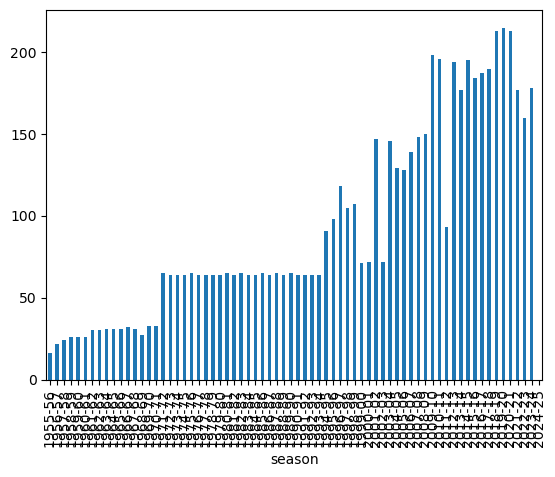

In [607]:
df.groupby('season')['remaining_teams_count'].max().plot.bar()

## Let's find all Eastern European clubs

In [608]:
easternCountries = ['Hungary','Poland','Socialist Federal Republic of Yugoslavia','Romania','Czechoslovakia','Bulgaria','East Germany','Albania','Soviet Union','Commonwealth of Independent States','Slovenia','Estonia','Latvia','Ukraine','Russia','Lithuania','Georgia (country)','Moldova','Croatia','Belarus','Czech Republic','Federal Republic of Yugoslavia','North Macedonia','Armenia','Azerbaijan','Slovakia','Bosnia and Herzegovina','Kazakhstan','Serbia and Montenegro','Serbia','Montenegro','Kosovo']

In [609]:
easternClubs_wo_Germany = df[df['homeTeamCountry'].isin(easternCountries)]['homeTeam'].to_list()

In [610]:
easternGermanUrls = ['RB_Leipzig','1._FC_Union_Berlin','1._FC_Magdeburg','Hallescher_FC','FC_Rot-Wei%C3%9F_Erfurt']

In [611]:
easternGermanClubs = df[df['homeTeamCountry'] == 'East Germany']['homeTeam'].drop_duplicates().to_list() + df[df['homeTeamUrl'].isin(easternGermanUrls)]['homeTeam'].drop_duplicates().to_list()

In [612]:
easternClubs = easternClubs_wo_Germany + easternGermanClubs

In [613]:
east = df[df['homeTeam'].isin(easternClubs)]
east2 =  df[df['homeTeam'].isin(easternClubs) | df['awayTeam'].isin(easternClubs)]
four = df[df['homeTeamCountry'].isin(['Germany','West Germany','Italy','Spain','England'])]

## Now for some basic exploration

<Axes: xlabel='season'>

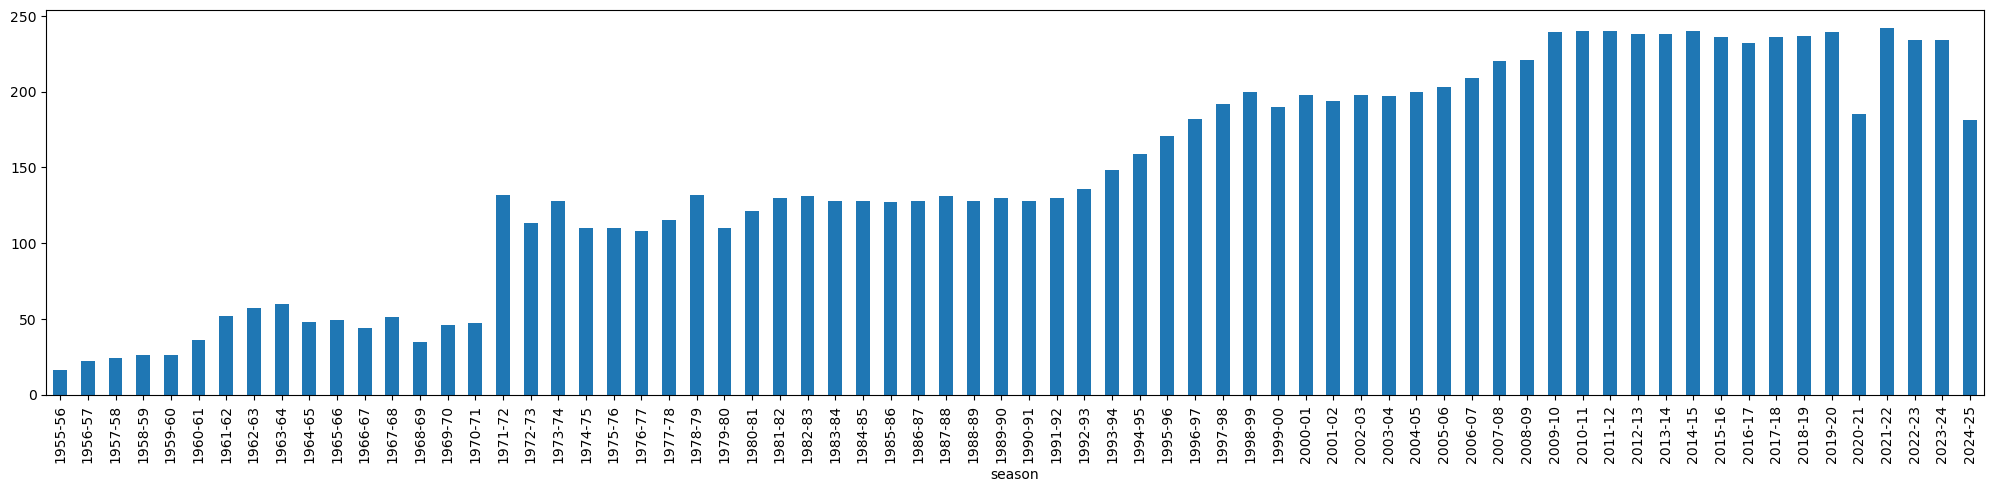

In [614]:
df.groupby('season')['homeTeam'].nunique().plot.bar(figsize=(25,5))

<Axes: xlabel='season'>

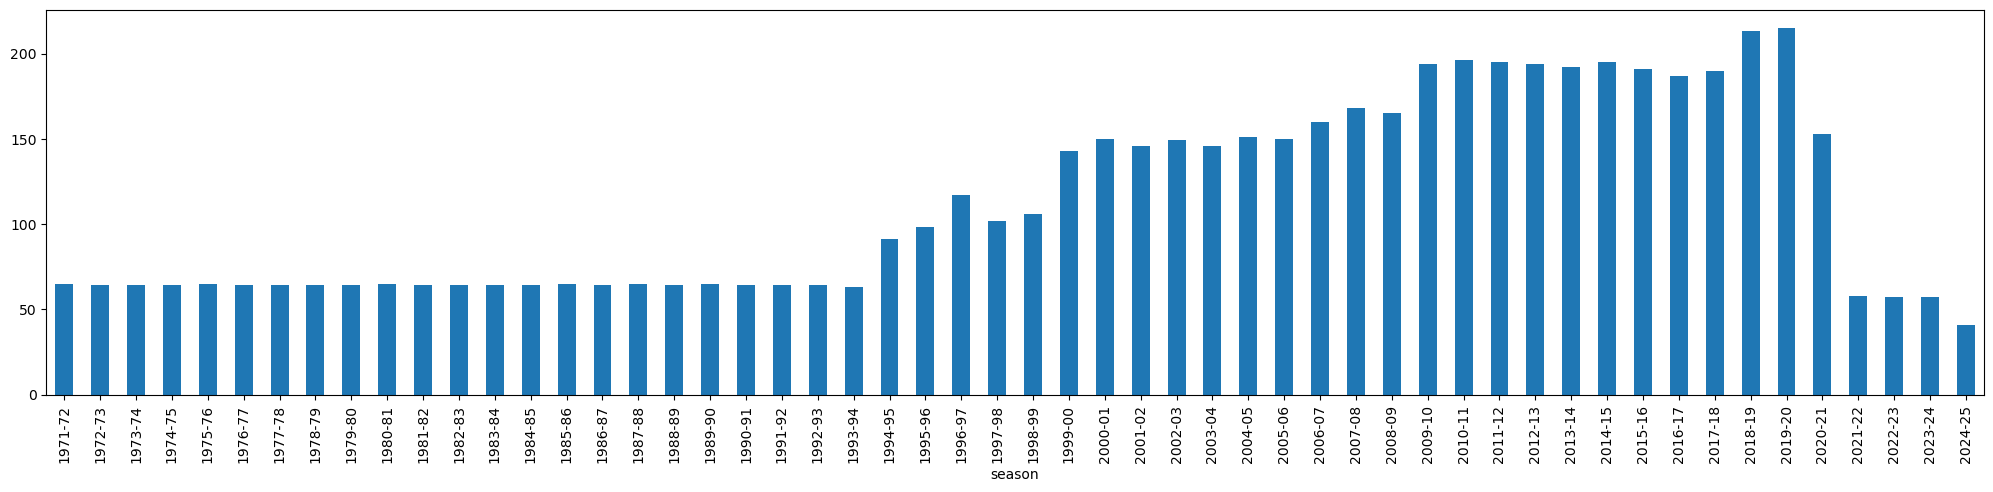

In [615]:
df[df['competition'] == 'EL'].groupby('season')['homeTeam'].nunique().plot.bar(figsize=(25,5))

<Axes: xlabel='season'>

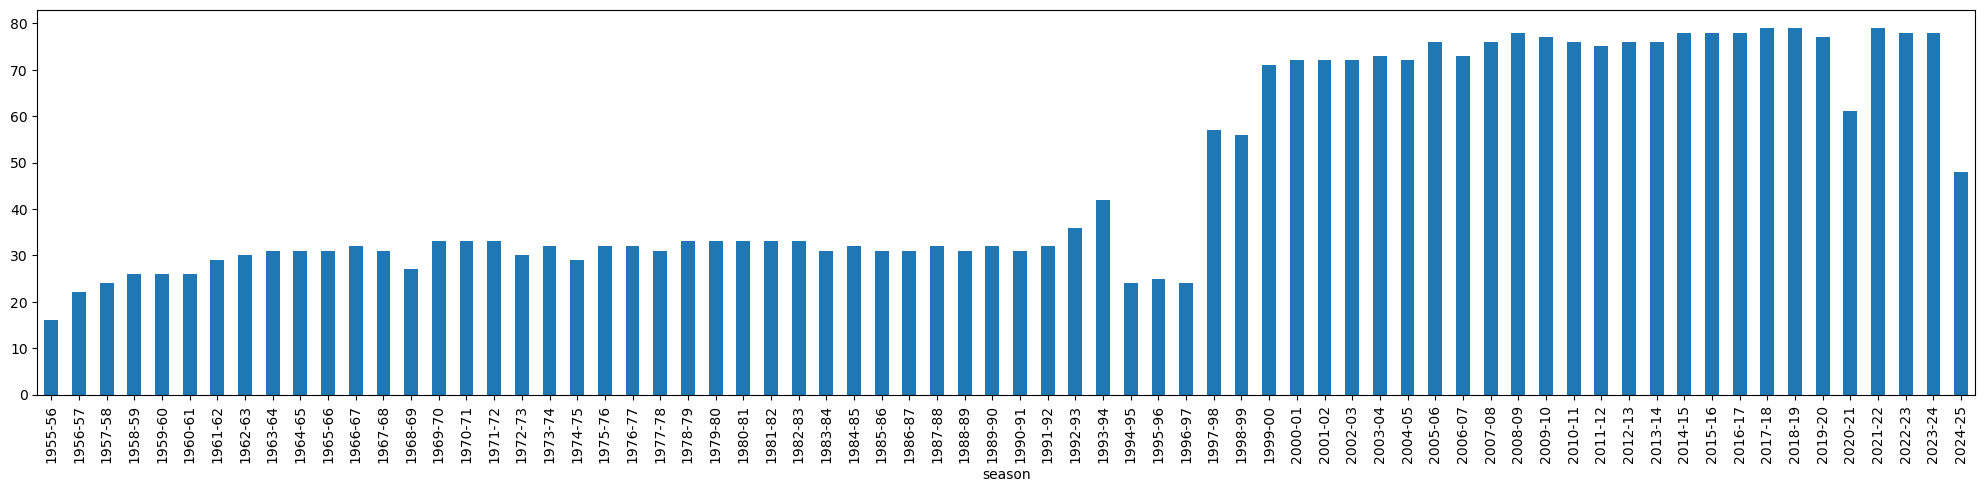

In [616]:
df[df['competition'] == 'UCL'].groupby('season')['homeTeam'].nunique().plot.bar(figsize=(25,5))

In [617]:
east[east['competition'] == 'UCL'].groupby('homeTeam').size().nlargest(10)

homeTeam
Dynamo Kyiv          132
Red Star Belgrade     79
Shakhtar Donetsk      79
Sparta Prague         76
Steaua București      70
Dinamo Zagreb         67
Spartak Moscow        61
Partizan              53
BATE Borisov          52
CSKA Moscow           52
dtype: int64

In [618]:
east.groupby('city').size().nlargest(60)

city
Belgrade            358
Moscow              339
Bucharest           335
Prague              335
Sofia               303
Budapest            290
Kyiv                223
Baku                187
Zagreb              175
Bratislava          142
Warsaw              142
Skopje              141
Yerevan             140
Tallinn             131
Tirana              108
Donetsk              98
Split                98
Riga                 94
Tbilisi              93
Maribor              92
Tiraspol             90
Minsk                89
Saint Petersburg     88
Sarajevo             87
Chișinău             77
Vilnius              70
Podgorica            69
Plzeň                63
Poznań               62
Razgrad              62
Kraków               61
Cluj-Napoca          60
Leipzig              60
Trnava               58
Ljubljana            57
Rijeka               51
Barysaw              48
Chorzów              47
Žilina               47
Craiova              46
Dresden              46
Astana     

In [619]:
east[east['competition'] == 'UCL'].sort_values(by='remaining_teams_count').sort_values(by='remaining_teams_count')

,competition,date,score,homeTeam,homeTeamCountry,homeTeamUrl,awayTeam,awayTeamCountry,awayTeamUrl,location,phase,attendance,competitonOriginal,season,city,remaining_teams_count
19425,UCL,1989-05-24,0-4,Steaua București,Romania,CSA_Steaua_Bucure%C8%99ti_(football),Milan,Italy,AC_Milan,"Camp Nou, Barcelona",final,97000.0,1988–89 European Cup,1988-89,Barcelona,2.0
19248,UCL,1986-05-07,0-0 (a.e.t.),Steaua București,Romania,CSA_Steaua_Bucure%C8%99ti_(football),Barcelona,Spain,FC_Barcelona,"Estadio Ramón Sánchez Pizjuán, Seville",final,65000.0,1985–86 European Cup,1985-86,Seville,2.0
19546,UCL,1991-05-29,0-0 (a.e.t.),Red Star Belgrade,Socialist Federal Republic of Yugoslavia,Red_Star_Belgrade,Marseille,France,Olympique_de_Marseille,"Stadio San Nicola, Bari",final,51587.0,1990–91 European Cup,1990-91,Bari,2.0
19185,UCL,1984-04-25,1-2,Dinamo București,Romania,FC_Dinamo_Bucure%C8%99ti,Liverpool,England,Liverpool_F.C.,"Stadionul 23 August, Bucharest",semi-finals,40213.0,1983–84 European Cup,1983-84,Bucharest,4.0
18751,UCL,1977-04-06,1-0,Dynamo Kyiv,Soviet Union,FC_Dynamo_Kyiv,Borussia Mönchengladbach,West Germany,Borussia_M%C3%B6nchengladbach,"Central Stadium, Kyiv",semi-finals,102000.0,1976–77 European Cup,1976-77,Kyiv,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25786,UCL,2024-08-07,v,Slovan Bratislava,Slovakia,%C5%A0K_Slovan_Bratislava,APOEL,Cyprus,APOEL_FC,"Národný futbalový štadión, Bratislava",third qualifying round,NaN,2024–25 UEFA Champions League qualifying phase...,2024-25,Bratislava,NaN
25787,UCL,2024-08-07,v,Slavia Prague,Czech Republic,SK_Slavia_Prague,Union Saint-Gilloise,Belgium,Royale_Union_Saint-Gilloise,"Fortuna Arena, Prague",third qualifying round,NaN,2024–25 UEFA Champions League qualifying phase...,2024-25,Prague,NaN
25788,UCL,2024-08-13,v,Ferencváros,Hungary,NaN,Midtjylland,Denmark,NaN,"Ferencváros Stadion, Budapest",third qualifying round,NaN,2024–25 UEFA Champions League qualifying phase...,2024-25,Budapest,NaN
25792,UCL,2024-08-13,v,FCSB,Romania,NaN,Sparta Prague,Czech Republic,NaN,"Steaua Stadium, Bucharest",third qualifying round,NaN,2024–25 UEFA Champions League qualifying phase...,2024-25,Bucharest,NaN


In [620]:
east2.sort_values(by='remaining_teams_count').sort_values(by='remaining_teams_count')

,competition,date,score,homeTeam,homeTeamCountry,homeTeamUrl,awayTeam,awayTeamCountry,awayTeamUrl,location,phase,attendance,competitonOriginal,season,city,remaining_teams_count
2867,EL,1979-05-09,1-1,Red Star Belgrade,Socialist Federal Republic of Yugoslavia,Red_Star_Belgrade,Borussia Mönchengladbach,West Germany,Borussia_M%C3%B6nchengladbach,"Red Star Stadium, Belgrade",final,64312.0,1978–79 UEFA Cup,1978-79,Belgrade,2.0
292,CWC,1970-04-29,2-1,Manchester City,England,Manchester_City_F.C.,Górnik Zabrze,Poland,G%C3%B3rnik_Zabrze,"Praterstadion, Vienna",final,7968.0,1969–70 European Cup Winners' Cup,1969-70,Vienna,2.0
11462,EL,2015-05-27,2-3,Dnipro Dnipropetrovsk,Ukraine,FC_Dnipro,Sevilla,Spain,Sevilla_FC,"National Stadium, Warsaw",final,45000.0,2014–15 UEFA Europa League knockout phase,2014-15,Warsaw,2.0
8344,EL,2008-05-14,2-0,Zenit Saint Petersburg,Russia,FC_Zenit_Saint_Petersburg,Rangers,Scotland,Rangers_F.C.,"City of Manchester Stadium, Manchester",final,43878.0,2007–08 UEFA Cup knockout stage,2007-08,Manchester,2.0
7321,EL,2005-05-18,1-3,Sporting CP,Portugal,Sporting_CP,CSKA Moscow,Russia,PFC_CSKA_Moscow,"Estádio José Alvalade, Lisbon",final,47085.0,2004–05 UEFA Cup knockout stage,2004-05,Lisbon,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27174,UECL,2024-08-15,v,CFR Cluj,Romania,NaN,Maccabi Petah Tikva,Israel,NaN,"Dr. Constantin Rădulescu Stadium, Cluj-Napoca",third qualifying round,NaN,2024–25 UEFA Conference League qualifying phas...,2024-25,Cluj-Napoca,NaN
27176,UECL,2024-08-15,v,Zira,Azerbaijan,NaN,Osijek,Croatia,NaN,"Dalga Arena, Baku",third qualifying round,NaN,2024–25 UEFA Conference League qualifying phas...,2024-25,Baku,NaN
27177,UECL,2024-08-15,v,Śląsk Wrocław,Poland,NaN,St. Gallen,Switzerland,NaN,"Wrocław Stadium, Wroclaw",third qualifying round,NaN,2024–25 UEFA Conference League qualifying phas...,2024-25,Wroclaw,NaN
27178,UECL,2024-08-15,v,Zrinjski Mostar,Bosnia and Herzegovina,NaN,Botev Plovdiv,Bulgaria,NaN,"Stadion pod Bijelim Brijegom, Mostar",third qualifying round,NaN,2024–25 UEFA Conference League qualifying phas...,2024-25,Mostar,NaN


<Axes: xlabel='season'>

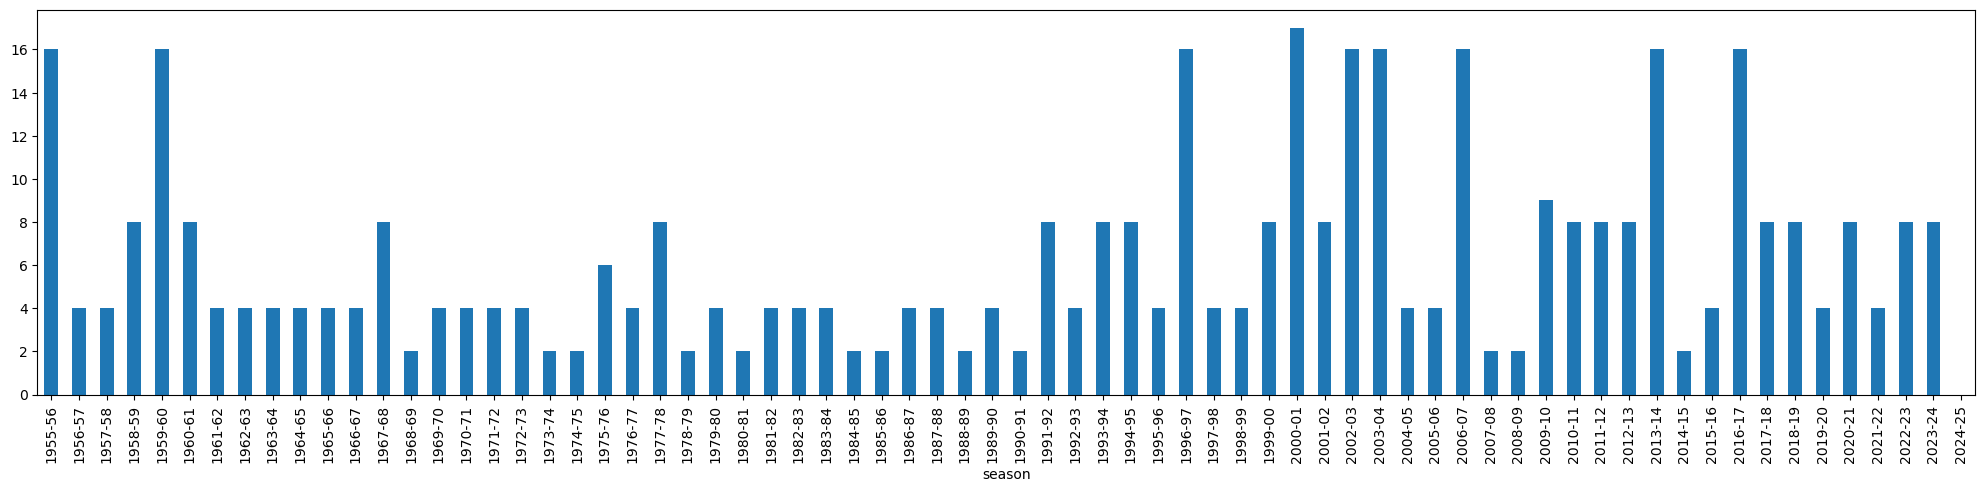

In [621]:
east.groupby('season')['remaining_teams_count'].min().plot.bar(figsize=(25,5))

<Axes: xlabel='season'>

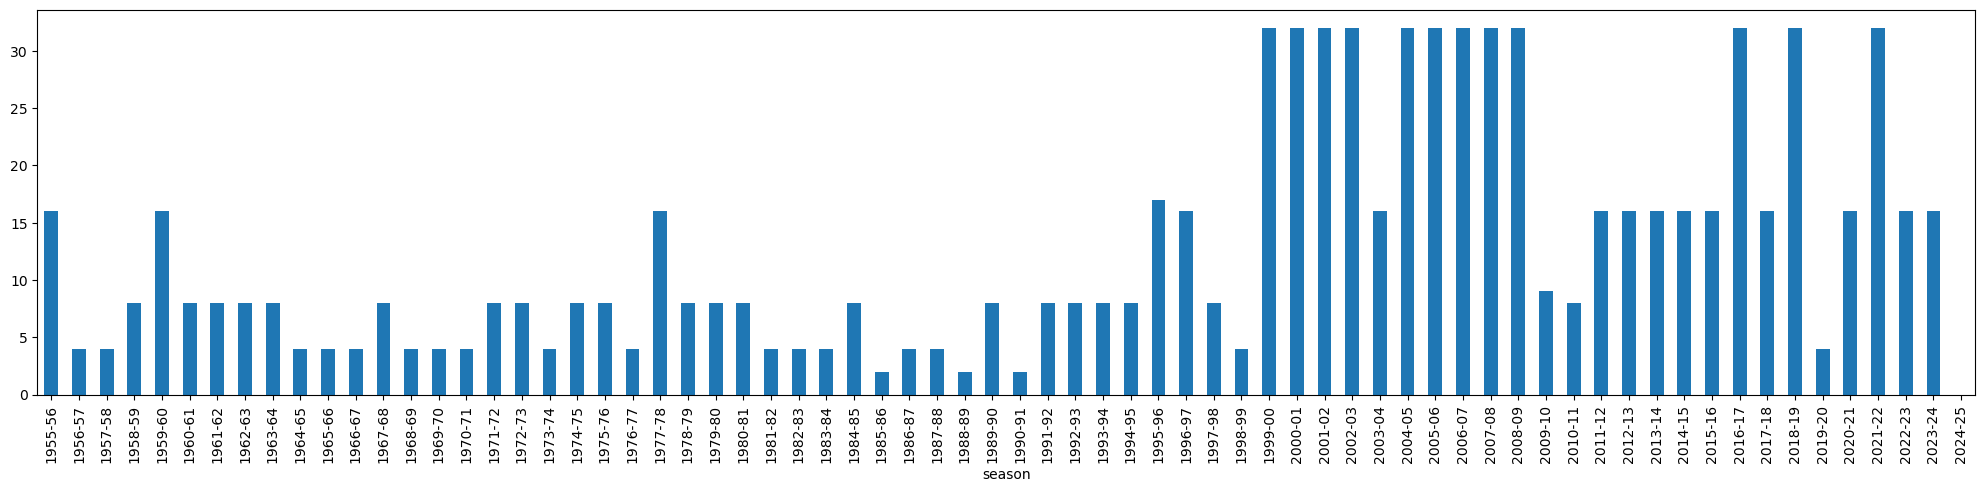

In [622]:
east[east['competition'] == 'UCL'].groupby('season')['remaining_teams_count'].min().plot.bar(figsize=(25,5))

In [623]:
east[east['homeTeamCountry'] == 'Republic of Ireland']

,competition,date,score,homeTeam,homeTeamCountry,homeTeamUrl,awayTeam,awayTeamCountry,awayTeamUrl,location,phase,attendance,competitonOriginal,season,city,remaining_teams_count


In [624]:
east[east['competition'] == 'UCL'].groupby('homeTeamCountry')['remaining_teams_count'].min().nsmallest(50)

homeTeamCountry
Socialist Federal Republic of Yugoslavia     2.0
Romania                                      2.0
Ukraine                                      4.0
Poland                                       4.0
Bulgaria                                     4.0
Soviet Union                                 4.0
Czechoslovakia                               4.0
Hungary                                      4.0
Germany                                      4.0
Russia                                       8.0
Commonwealth of Independent States           8.0
Croatia                                      8.0
East Germany                                 8.0
Albania                                     16.0
Czech Republic                              16.0
Slovakia                                    24.0
Kazakhstan                                  32.0
Slovenia                                    32.0
Serbia                                      32.0
Moldova                                     32.0
Azer

<Axes: xlabel='season'>

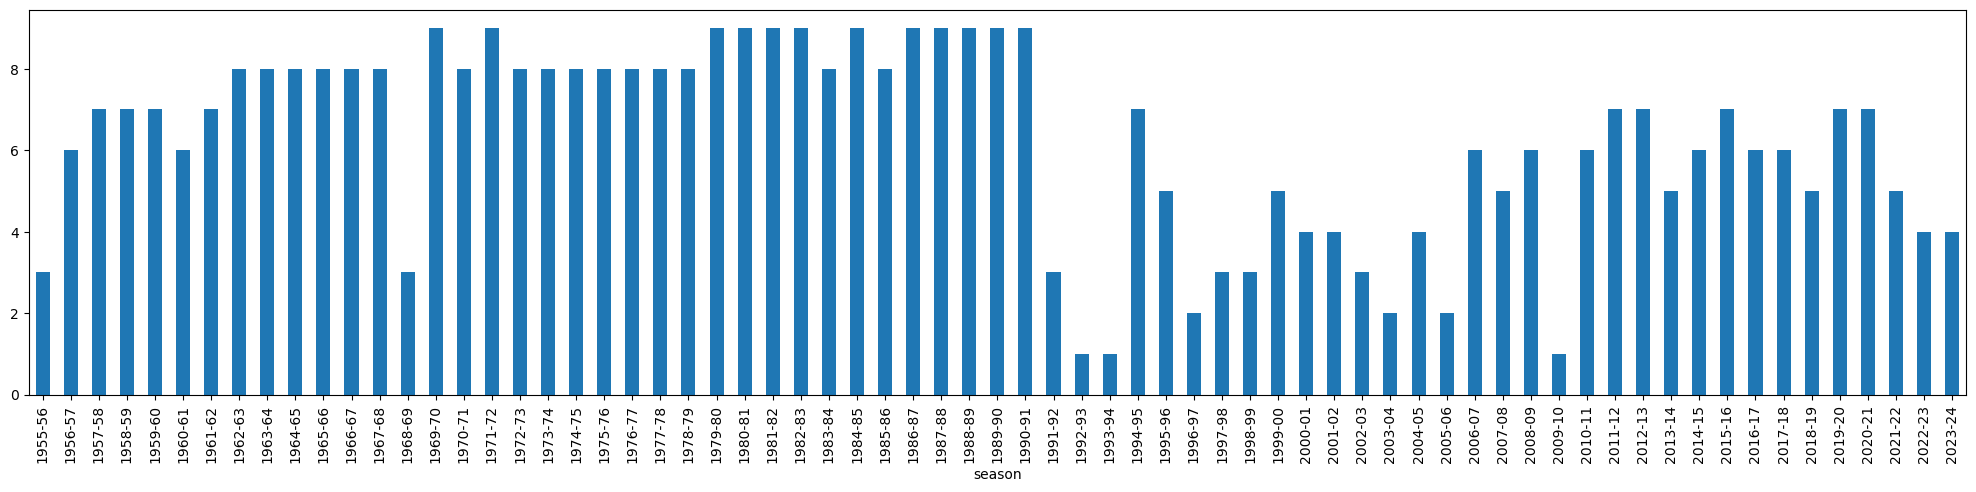

In [625]:
east[(east['competition'] == 'UCL') & (east['remaining_teams_count'] <= 32)].groupby('season')['homeTeam'].nunique().plot.bar(figsize=(25,5))

<Axes: xlabel='season'>

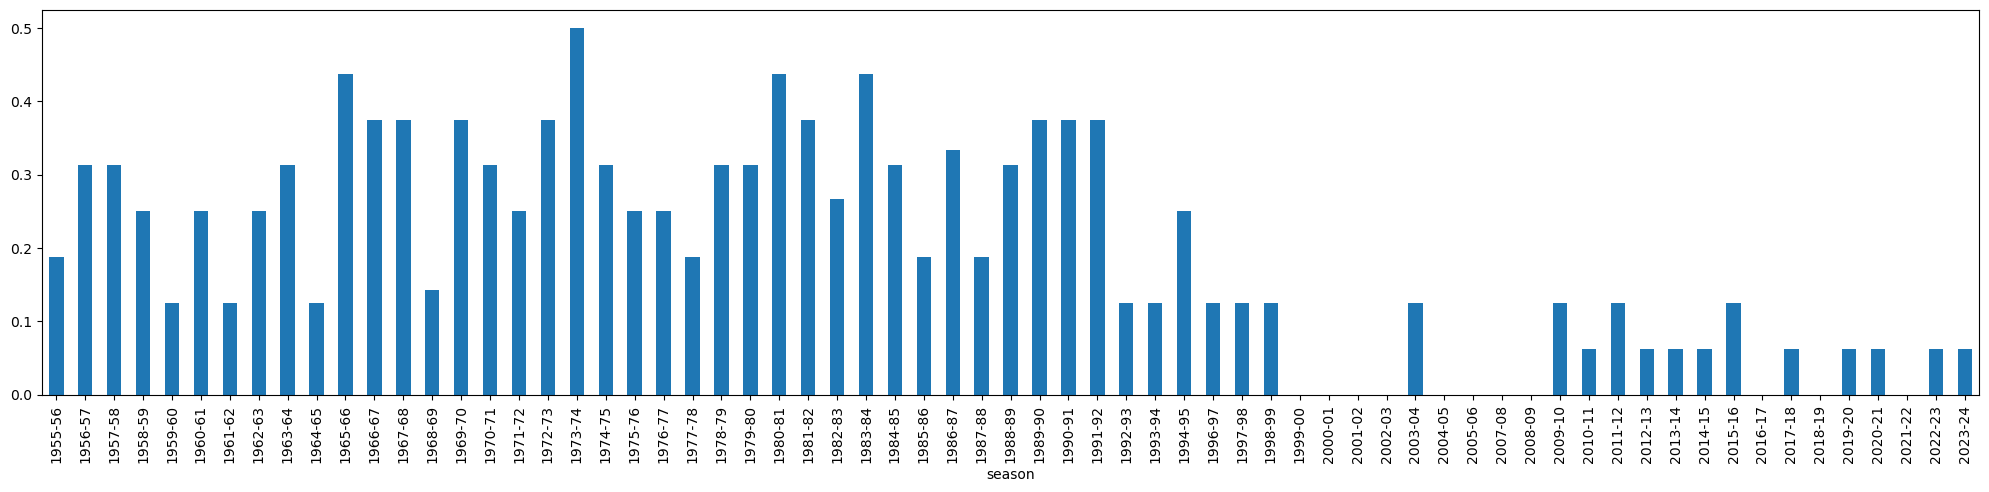

In [626]:
pd.Series(east[(east['competition'] == 'UCL') & (east['remaining_teams_count'] <= 16)].groupby('season')['homeTeam'].nunique() / df[(df['competition'] == 'UCL') & (df['remaining_teams_count'] <= 16)].groupby('season')['homeTeam'].nunique()).plot.bar(figsize=(25,5))

<Axes: xlabel='season'>

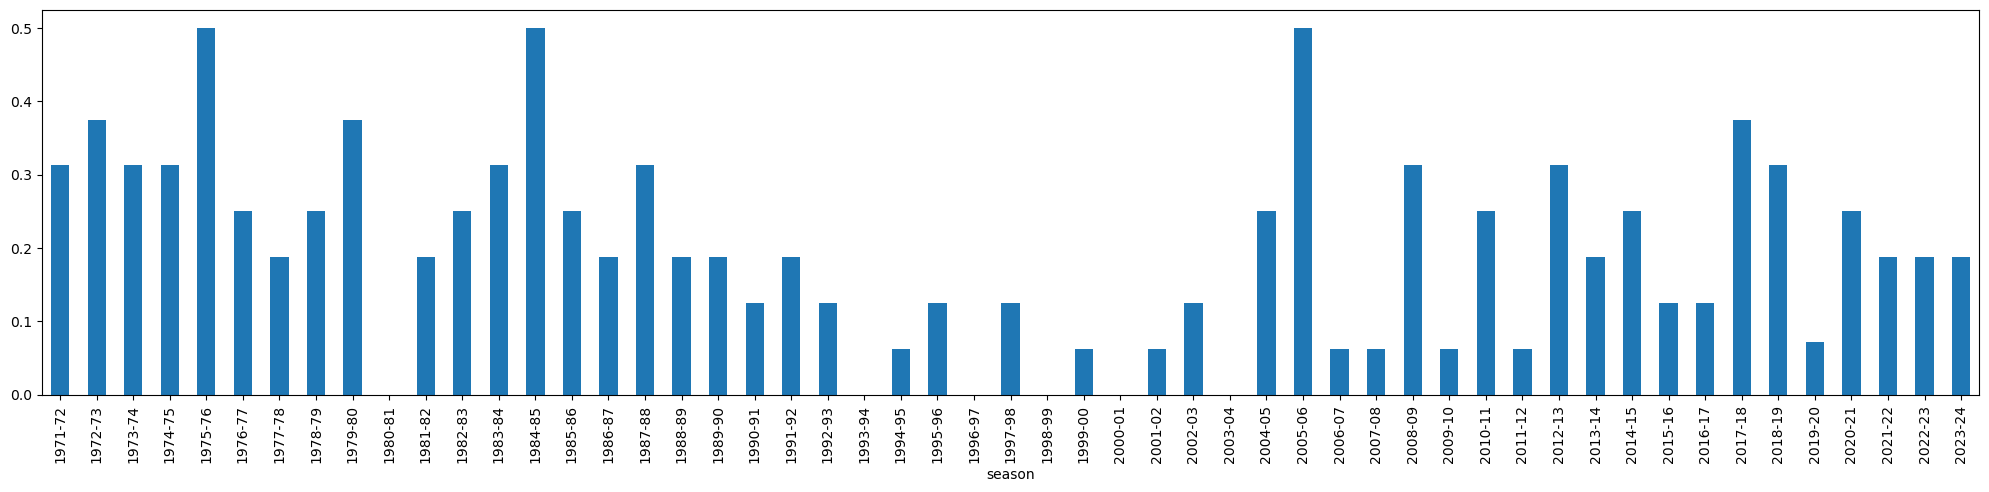

In [627]:
pd.Series(east[(east['competition'] == 'EL') & (east['remaining_teams_count'] <= 16)].groupby('season')['homeTeam'].nunique() / df[(df['competition'] == 'EL') & (df['remaining_teams_count'] <= 16)].groupby('season')['homeTeam'].nunique()).plot.bar(figsize=(25,5))

<Axes: xlabel='season'>

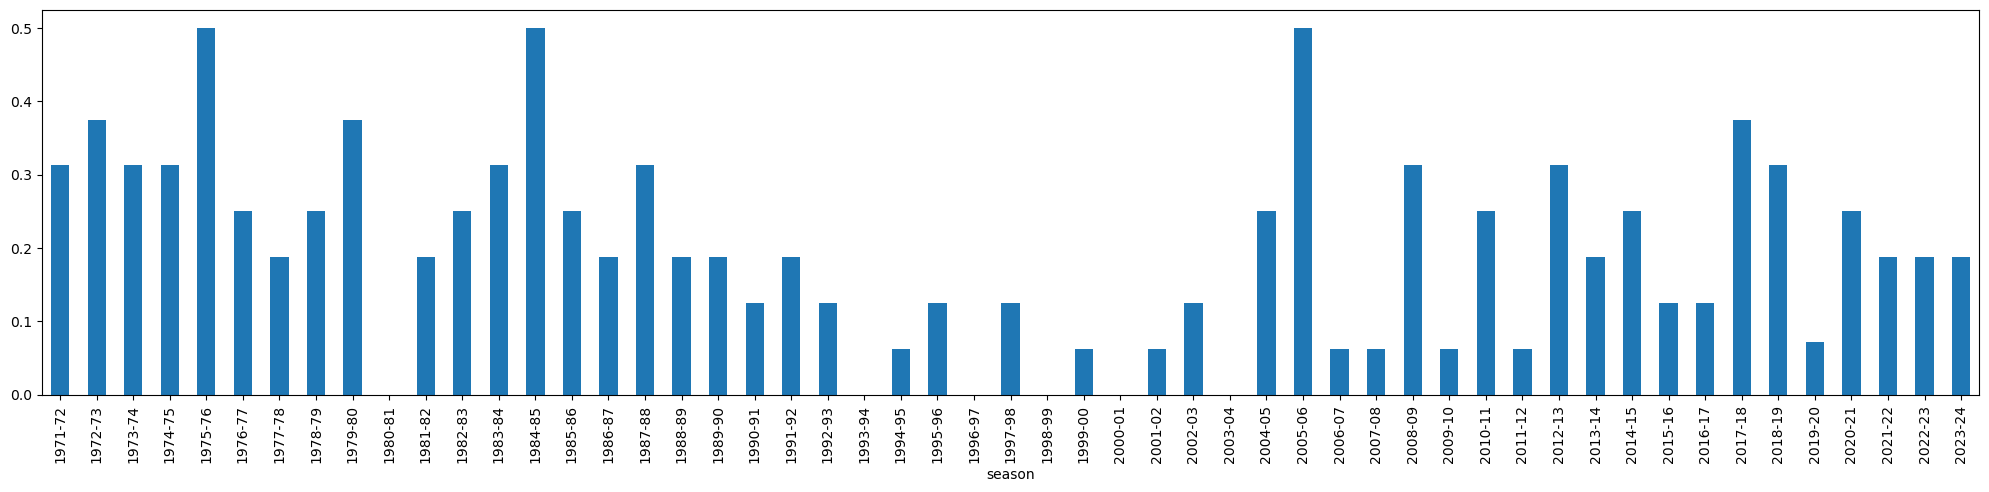

In [628]:
pd.Series(east[(east['competition'] == 'EL') & (east['remaining_teams_count'] <= 16)].groupby('season')['homeTeam'].nunique() / df[(df['competition'] == 'EL') & (df['remaining_teams_count'] <= 16)].groupby('season')['homeTeam'].nunique()).plot.bar(figsize=(25,5))

In [629]:
east[(east['competition'] == 'UCL') & (east['season'] == '1991-92')].groupby('homeTeam')['remaining_teams_count'].min().nsmallest(10)

homeTeam
Dynamo Kyiv              8.0
Red Star Belgrade        8.0
Sparta Prague            8.0
Etar Veliko Tarnovo      NaN
Flamurtari               NaN
Hansa Rostock            NaN
Kispest Honvéd           NaN
Universitatea Craiova    NaN
Zagłębie Lubin           NaN
Name: remaining_teams_count, dtype: float64

In [630]:
half = len(df[df['competition'] == 'UCL'].groupby('season').size()) / 2

In [631]:
df[df['competition'] == 'UCL'].groupby('season').size().head(35)

season
1955-56    29
1956-57    44
1957-58    48
1958-59    55
1959-60    52
1960-61    51
1961-62    56
1962-63    59
1963-64    61
1964-65    63
1965-66    59
1966-67    65
1967-68    60
1968-69    52
1969-70    63
1970-71    63
1971-72    64
1972-73    58
1973-74    60
1974-75    55
1975-76    61
1976-77    61
1977-78    59
1978-79    63
1979-80    63
1980-81    63
1981-82    63
1982-83    62
1983-84    59
1984-85    61
1985-86    59
1986-87    57
1987-88    61
1988-89    60
1989-90    61
dtype: int64

In [632]:
east[(east['competition'] == 'UCL') & (east['season'] == '1992-93')].groupby('homeTeam')['remaining_teams_count'].min().nsmallest(10)

homeTeam
CSKA Moscow           8.0
CSKA Sofia            NaN
Dinamo București      NaN
Ferencváros           NaN
Lech Poznań           NaN
Norma Tallinn         NaN
Olimpija Ljubljana    NaN
Skonto                NaN
Slovan Bratislava     NaN
Tavriya Simferopol    NaN
Name: remaining_teams_count, dtype: float64

In [633]:
east[(east['competition'] == 'UCL') & (east['season'] > '1989-90') & (east['remaining_teams_count'] <= 32)].groupby('homeTeam').size().nlargest(16)

homeTeam
Dynamo Kyiv               60
Shakhtar Donetsk          59
Spartak Moscow            43
CSKA Moscow               36
Sparta Prague             30
Zenit Saint Petersburg    30
RB Leipzig                24
Steaua București          22
Lokomotiv Moscow          19
Dinamo Zagreb             18
Red Star Belgrade         17
BATE Borisov              15
Viktoria Plzeň            12
CFR Cluj                   9
Maribor                    9
Legia Warsaw               7
dtype: int64

In [634]:
pd.Series(east[(east['competition'] == 'UCL') & (east['season'] <= '1989-90')].groupby('homeTeam').size() / east[(east['competition'] == 'UCL') & (east['season'] > '1989-90')].groupby('homeTeam').size()).sort_values().dropna()

homeTeam
Dinamo Zagreb             0.030769
CSKA Moscow               0.040000
Vardar                    0.090909
Levski Sofia              0.105263
Dinamo Tbilisi            0.105263
Spartak Moscow            0.109091
Lech Poznań               0.181818
Slovan Bratislava         0.181818
Wisła Kraków              0.230769
Sparta Prague             0.245902
Dynamo Kyiv               0.257143
Legia Warsaw              0.275862
Ferencváros               0.310345
Dinamo Tirana             0.400000
Steaua București          0.428571
Partizan                  0.432432
Vllaznia                  0.500000
ŁKS Łódź                  0.500000
Željezničar               0.500000
Śląsk Wrocław             0.500000
Sarajevo                  0.600000
Dinamo Minsk              0.600000
Widzew Łódź               0.625000
Red Star Belgrade         0.755556
Hajduk Split              0.818182
Rapid București           1.000000
Partizani                 1.400000
MTK Budapest              2.000000
CSKA Sofia 

<Axes: xlabel='season', ylabel='remaining_teams_count'>

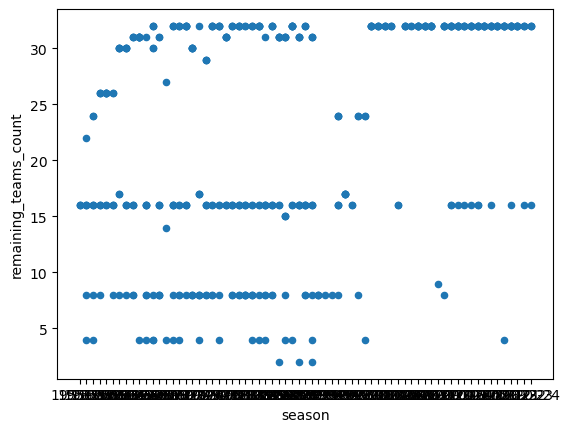

In [635]:
pd.DataFrame(east[(east['competition'] == 'UCL') & (east['remaining_teams_count'] <= 32)].groupby(['season','homeTeam'])['remaining_teams_count'].min()).reset_index().plot.scatter(x='season',y='remaining_teams_count')

<Axes: xlabel='season'>

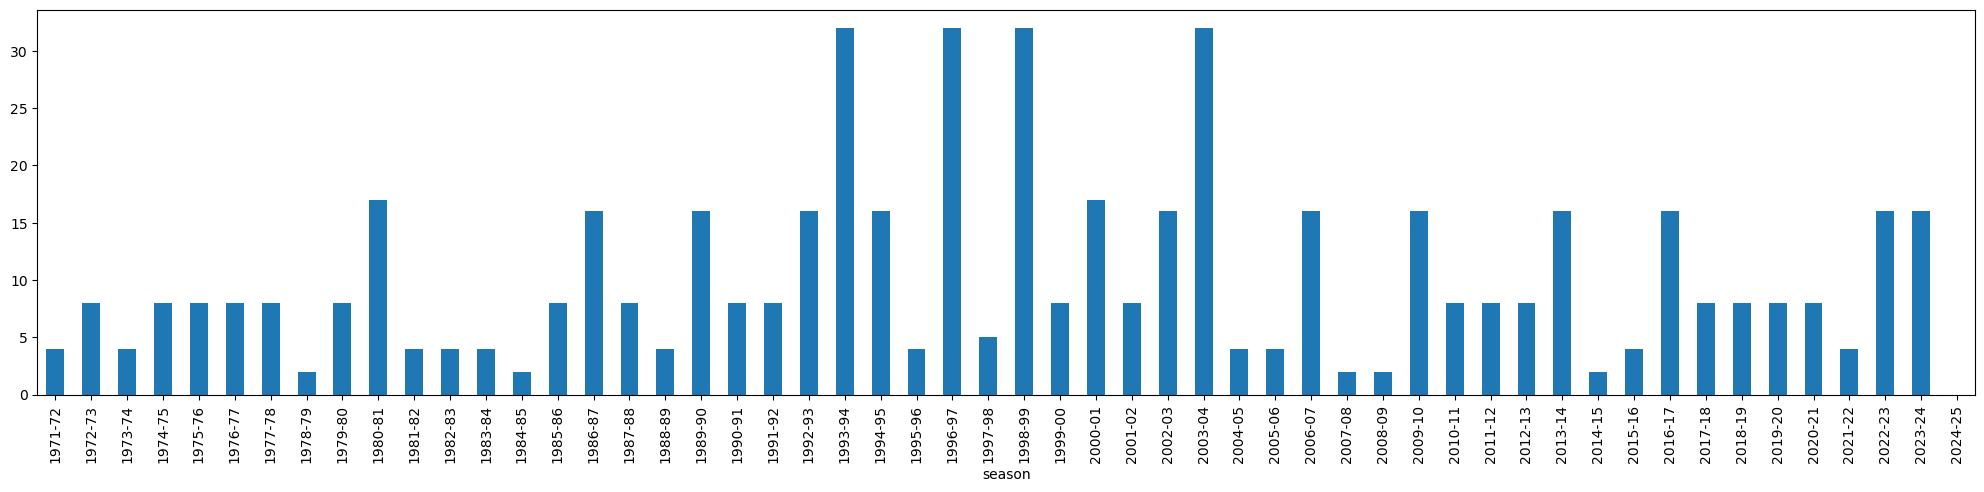

In [636]:
east[east['competition'] == 'EL'].groupby('season')['remaining_teams_count'].min().plot.bar(figsize=(25,5))

<Axes: xlabel='season'>

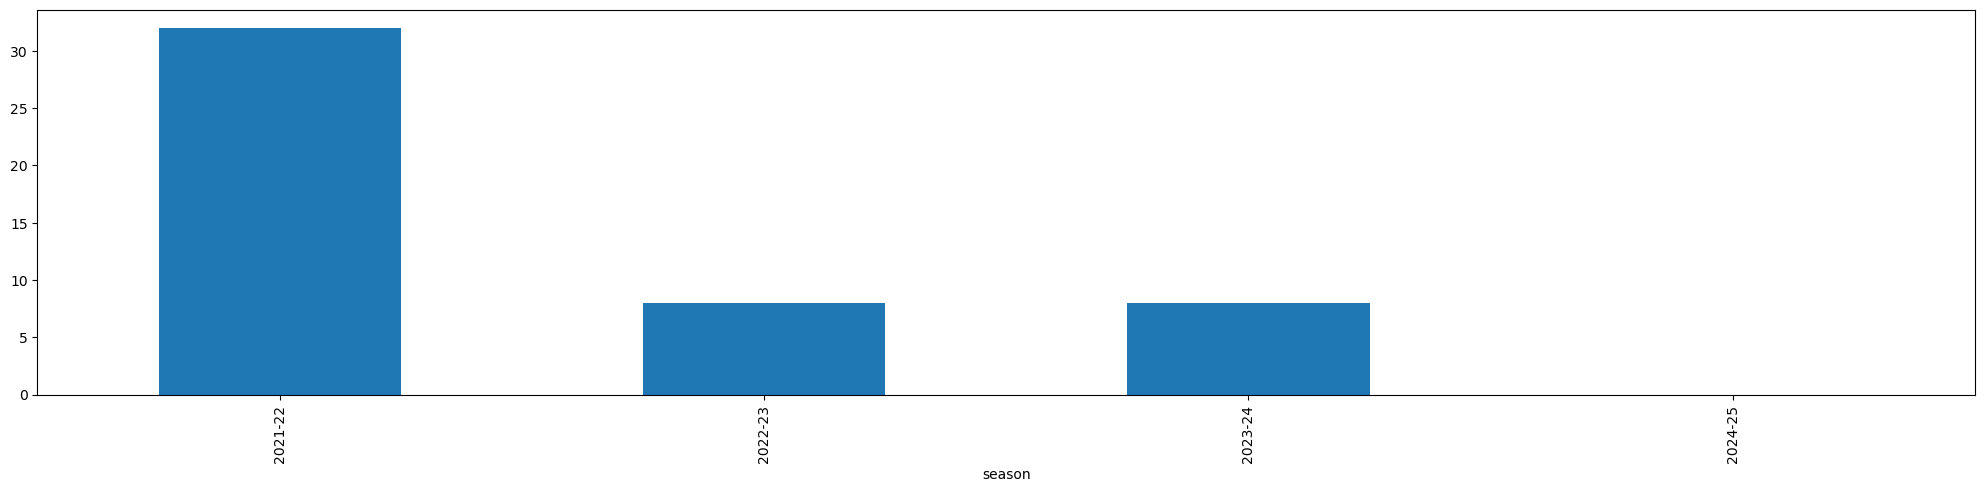

In [637]:
east[east['competition'] == 'UECL'].groupby('season')['remaining_teams_count'].min().plot.bar(figsize=(25,5))

In [638]:
east[(east['competition'] == 'UCL')].groupby(['season','homeTeamCountry'])['remaining_teams_count'].min()

season   homeTeamCountry                         
1955-56  Hungary                                     16.0
         Poland                                      16.0
         Socialist Federal Republic of Yugoslavia    16.0
1956-57  Bulgaria                                     8.0
         Czechoslovakia                              16.0
                                                     ... 
2024-25  Romania                                      NaN
         Serbia                                       NaN
         Slovakia                                     NaN
         Slovenia                                     NaN
         Ukraine                                      NaN
Name: remaining_teams_count, Length: 979, dtype: float64

## Club names

In [639]:
east['nazev'] = east['homeTeam'].apply(lambda x: x.split(' ')[0])
east['dedina'] = east['homeTeam'].apply(lambda x: x.split(' ')[-1])

C:\Users\micha\AppData\Local\Temp\ipykernel_33668\3891702428.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  east['nazev'] = east['homeTeam'].apply(lambda x: x.split(' ')[0])
C:\Users\micha\AppData\Local\Temp\ipykernel_33668\3891702428.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  east['dedina'] = east['homeTeam'].apply(lambda x: x.split(' ')[-1])


In [640]:
nazvy = east.groupby('nazev')['dedina'].nunique().nlargest(1000)
nazvy = nazvy[nazvy >= 3]
nazvy

nazev
Spartak      11
Dinamo        7
Dynamo        7
CSKA          6
FK            5
FC            4
Artmedia      3
Zenit         3
Metalurh      3
Zagłębie      3
Daugava       3
Levadia       3
Arsenal       3
Bohemians     3
Lokomotiv     3
MTK           3
Budućnost     3
NK            3
Vasas         3
Olimpija      3
Slavia        3
Khazar        3
Inter         3
Name: dedina, dtype: int64

In [806]:
df[df['homeTeam'].str.lower().str.contains('kyiv',na=False)]['homeTeam'].drop_duplicates()

481       Dynamo Kyiv
1896        CSKA Kyiv
10925    Arsenal Kyiv
Name: homeTeam, dtype: object

In [793]:
df[df['homeTeam'].str.lower().str.contains('star',na=False)]['homeTeam'].drop_duplicates()

352          Red Star Belgrade
421     PFC Beroe Stara Zagora
637         Beroe Stara Zagora
710               Velež Mostar
2386                     Start
8365           Zrinjski Mostar
Name: homeTeam, dtype: object

In [805]:
east[east['homeTeam'].str.lower().str.contains('cska',na=False)]['homeTeam'].drop_duplicates().to_list()

['CSKA Cherveno Zname',
 'CSKA September Flag',
 'CSKA Sofia',
 'CSKA Moscow',
 'CSKA Kyiv',
 'CSKA Septemvriysko Zname',
 'CSKA Red Flag',
 'CSKA 1948']

In [642]:
east[east['homeTeam'].str.lower().str.contains('metal',na=False)]['homeTeam'].drop_duplicates()

1151          Metalist Kharkiv
1893        Liepājas Metalurgs
6819       Metalurh Zaporizhya
6903          Metalurh Donetsk
6980     Metalurh Zaporizhzhya
7871    FHK Liepājas Metalurgs
8570         Liepājas Metalurg
9589           Metalurg Skopje
Name: homeTeam, dtype: object

In [643]:
east[east['homeTeam'].str.lower().str.contains('slavia',na=False)]['homeTeam'].drop_duplicates()

131      Slavia Sofia
1810    Slavia Prague
6211     Slavia Mozyr
Name: homeTeam, dtype: object

In [644]:
east[east['homeTeam'].str.lower().str.contains('cska',na=False)]['homeTeam'].drop_duplicates()

214           CSKA Cherveno Zname
316           CSKA September Flag
489                    CSKA Sofia
1320                  CSKA Moscow
1896                    CSKA Kyiv
3661     CSKA Septemvriysko Zname
17853               CSKA Red Flag
26807                   CSKA 1948
Name: homeTeam, dtype: object

In [645]:
east[east['homeTeam'].str.lower().str.contains('arsenal',na=False)]['homeTeam'].drop_duplicates()

10925     Arsenal Kyiv
14253     Arsenal Tula
26602    Arsenal Tivat
Name: homeTeam, dtype: object

In [646]:
east[east['nazev'].str.contains('Slav',na=False)]['homeTeam'].drop_duplicates()

131      Slavia Sofia
1810    Slavia Prague
6211     Slavia Mozyr
8353    Slaven Belupo
9452          Slavija
Name: homeTeam, dtype: object

In [647]:
east[east['nazev'].str.contains('Ol',na=False)]['homeTeam'].drop_duplicates()

314      Olimpija Ljubljana
1583          Olimpija Rīga
8730             Olimps/RFS
8769           Olimpik Baku
9544               Olimpija
9555                Olimpia
11959               Olimpic
12846          Oleksandriya
13315       Olimpik Donetsk
Name: homeTeam, dtype: object

In [648]:
east[east['nazev'].str.contains('Loko',na=False)]['homeTeam'].drop_duplicates()

541           Lokomotiv Sofia
715        Lokomotive Leipzig
1714         Lokomotiv Moscow
1943     Lokomotiv-96 Vitebsk
2029        Lokomotiv Plovdiv
2914        Lokomotíva Košice
11311              Lokomotiva
Name: homeTeam, dtype: object

In [649]:
east[east['nazev'].str.contains('Metal',na=False)]['homeTeam'].drop_duplicates()

1151         Metalist Kharkiv
6819      Metalurh Zaporizhya
6903         Metalurh Donetsk
6980    Metalurh Zaporizhzhya
9589          Metalurg Skopje
Name: homeTeam, dtype: object

In [650]:
df['nazev'] = df['homeTeam'].apply(lambda x: x.split(' ')[0])
df['dedina'] = df['homeTeam'].apply(lambda x: x.split(' ')[-1])

In [651]:
df.groupby('nazev')['dedina'].nunique().nlargest(50)

nazev
FC             18
Spartak        11
Inter           9
Dinamo          8
Hapoel          8
Dynamo          7
FK              7
CSKA            6
IFK             5
Racing          5
Real            5
St              5
Aris            4
Arsenal         4
Austria         4
B               4
Maccabi         4
1.              3
Admira          3
Apollon         3
Artmedia        3
BK              3
Bnei            3
Bohemians       3
Boldklubben     3
Budućnost       3
Cork            3
Daugava         3
Fortuna         3
KR              3
Khazar          3
La              3
Lausanne        3
Levadia         3
Lokomotiv       3
MTK             3
Metalurh        3
NK              3
Olimpija        3
PSV             3
Rapid           3
Red             3
SK              3
Slavia          3
Sporting        3
St.             3
Stade           3
Torpedo         3
Union           3
Vasas           3
Name: dedina, dtype: int64

In [746]:
df[df['nazev'].str.contains('Sparta',na=False)]['homeTeam'].drop_duplicates()

45                 Spartak Varna
95              Sparta Rotterdam
176      Spartak Prague Sokolovo
347               Levski-Spartak
401               Spartak Moscow
405                Sparta Prague
509               Spartak Trnava
2520        Levski-Spartak Sofia
4804         Spartak Vladikavkaz
6829             Spartak Yerevan
9927       Spartak Zlatibor Voda
12042           Spartaks Jūrmala
12491             Spartak Myjava
13403           Spartak Subotica
17750     Spartak Hradec Králové
17912            Spartak Plovdiv
Name: homeTeam, dtype: object

In [772]:
df[df['nazev'].str.contains('Prague',na=False)]

,competition,date,score,homeTeam,homeTeamCountry,homeTeamUrl,awayTeam,awayTeamCountry,awayTeamUrl,location,phase,attendance,competitonOriginal,season,city,remaining_teams_count,nazev,dedina


In [750]:
df[df['nazev'].str.contains('Hapoel',na=False)]['homeTeam'].drop_duplicates()

1406            Hapoel Petah Tikva
1772    Hapoel Ironi Rishon LeZion
1813            Hapoel Be'er Sheva
5176               Hapoel Tel Aviv
6021                  Hapoel Haifa
7055              Hapoel Ramat Gan
7641           Hapoel Bnei Sakhnin
8973    Hapoel Ironi Kiryat Shmona
Name: homeTeam, dtype: object

In [655]:
df[df['nazev'].str.contains('Real',na=False)]['homeTeam'].drop_duplicates()

200       Real Zaragoza
330         Real Madrid
542          Real Betis
1065      Real Sociedad
1190    Real Valladolid
Name: homeTeam, dtype: object

In [656]:
df[df['nazev'].str.contains('Metal',na=False)]['homeTeam'].drop_duplicates()

1151          Metalist Kharkiv
6819       Metalurh Zaporizhya
6903          Metalurh Donetsk
6980     Metalurh Zaporizhzhya
9589           Metalurg Skopje
10346      Metalurgist Rustavi
10554        Metalurgi Rustavi
Name: homeTeam, dtype: object

In [657]:
df[df['nazev'].str.contains('Ol',na=False)]['homeTeam'].drop_duplicates()

29               Olympiacos
314      Olimpija Ljubljana
552      Olympiakos Nicosia
1583          Olimpija Rīga
8730             Olimps/RFS
8769           Olimpik Baku
9081         Olimpi Rustavi
9544               Olimpija
9555                Olimpia
10421      Olympiakos Volou
10474      Olympiacos Volos
11959               Olimpic
12846          Oleksandriya
13315       Olimpik Donetsk
Name: homeTeam, dtype: object

In [658]:
df.groupby('nazev')['homeTeam'].nunique().nlargest(10)

nazev
FC         18
Spartak    11
Inter       9
CSKA        8
Dinamo      8
Hapoel      8
Dynamo      7
FK          7
IFK         5
Racing      5
Name: homeTeam, dtype: int64

In [659]:
df.groupby('nazev')['homeTeamCountry'].nunique().nlargest(20)

nazev
FC           12
Dynamo        9
Inter         8
Dinamo        7
Spartak       7
FK            6
Red           6
Arsenal       4
CSKA          4
Partizan      4
Slavia        4
Torpedo       4
1.            3
Aris          3
Borac         3
Budućnost     3
Hajduk        3
La            3
OFK           3
Olimpija      3
Name: homeTeamCountry, dtype: int64

In [660]:
df[df['nazev'].str.contains('Red',na=False)].groupby('homeTeamCountry')['homeTeam'].nunique().nlargest(20)

homeTeamCountry
Austria                                     1
Federal Republic of Yugoslavia              1
Luxembourg                                  1
Serbia                                      1
Serbia and Montenegro                       1
Socialist Federal Republic of Yugoslavia    1
Name: homeTeam, dtype: int64

In [661]:
df[df['nazev'].str.contains('Sparta',na=False)].groupby('homeTeamCountry')['homeTeam'].nunique().nlargest(20)

homeTeamCountry
Bulgaria          4
Czechoslovakia    4
Russia            2
Serbia            2
Slovakia          2
Armenia           1
Czech Republic    1
Latvia            1
Netherlands       1
Soviet Union      1
Name: homeTeam, dtype: int64

In [662]:
df[df['nazev'].str.contains('Ol',na=False)].groupby('homeTeamCountry')['homeTeam'].nunique().nlargest(10)

homeTeamCountry
Greece                                      3
Latvia                                      2
Slovenia                                    2
Ukraine                                     2
Azerbaijan                                  1
Bosnia and Herzegovina                      1
Cyprus                                      1
Georgia                                     1
Moldova                                     1
Socialist Federal Republic of Yugoslavia    1
Name: homeTeam, dtype: int64

In [663]:
df[df['nazev'].str.contains('namo',na=False)]['homeTeam'].drop_duplicates()

8           Dinamo Zagreb
32          Dynamo Žilina
207           Dynamo Kiev
289      Dinamo București
339         Dinamo Tirana
364         Dynamo Moscow
481           Dynamo Kyiv
642        Dinamo Tbilisi
764        Dynamo Dresden
1067         Dinamo Minsk
1621        Dinamo Batumi
1658      Dinamo-93 Minsk
5515     Dinamo Bucharest
5711          Dynamo Baku
8405         Dinamo Brest
13748        Dynamo Brest
Name: homeTeam, dtype: object

In [664]:
df[df['nazev'].str.lower().str.contains('dinam',na=False)]['homeTeam'].drop_duplicates()

8          Dinamo Zagreb
289     Dinamo București
339        Dinamo Tirana
642       Dinamo Tbilisi
1067        Dinamo Minsk
1621       Dinamo Batumi
1658     Dinamo-93 Minsk
5515    Dinamo Bucharest
8405        Dinamo Brest
Name: homeTeam, dtype: object

In [665]:
df[df['nazev'].str.lower().str.contains('dynam',na=False)]['homeTeam'].drop_duplicates()

32        Dynamo Žilina
207         Dynamo Kiev
364       Dynamo Moscow
481         Dynamo Kyiv
764      Dynamo Dresden
5711        Dynamo Baku
13748      Dynamo Brest
Name: homeTeam, dtype: object

In [666]:
east[east['nazev'].str.contains('namo',na=False)]['homeTeam'].drop_duplicates()

8           Dinamo Zagreb
32          Dynamo Žilina
207           Dynamo Kiev
289      Dinamo București
339         Dinamo Tirana
364         Dynamo Moscow
481           Dynamo Kyiv
642        Dinamo Tbilisi
764        Dynamo Dresden
1067         Dinamo Minsk
1658      Dinamo-93 Minsk
5515     Dinamo Bucharest
5711          Dynamo Baku
8405         Dinamo Brest
13748        Dynamo Brest
Name: homeTeam, dtype: object

## Getting more serious about losers / winners of the transformation

In [667]:
last_country = pd.DataFrame(east.sort_values(by='date').groupby('homeTeam')['homeTeamCountry'].last().reset_index())
last_country

,homeTeam,homeTeamCountry
0,1. FC Magdeburg,Germany
1,17 Nëntori,Albania
2,17 Nëntori Tirana,Albania
3,ASA Târgu Mureș,Romania
4,ASK Vorwärts Berlin,East Germany
...,...,...
671,Željezničar,Bosnia and Herzegovina
672,Željezničar Sarajevo,Bosnia and Herzegovina
673,Žepče,Bosnia and Herzegovina
674,Žilina,Slovakia


In [668]:
last_country[last_country['homeTeamCountry'].str.contains('Czechos')]

,homeTeam,homeTeamCountry
45,Banik Ostrava,Czechoslovakia
58,Bohemians,Czechoslovakia
60,Bohemians Prague,Czechoslovakia
61,Bohemians ČKD Prague,Czechoslovakia
146,Dukla Prague,Czechoslovakia
148,Dunajská Streda,Czechoslovakia
156,Dynamo Žilina,Czechoslovakia
223,Internacionál Bratislava,Czechoslovakia
224,Internacionál Slovnaft Bratislava,Czechoslovakia
308,Lokomotíva Košice,Czechoslovakia


In [669]:
last_country.loc[last_country['homeTeamCountry'] == 'Germany', 'homeTeamCountry'] = 'East Germany'
last_country.loc[last_country['homeTeam'] == 'Zenit', 'homeTeamCountry'] = 'Russia'
last_country.loc[last_country['homeTeam'].str.contains('Dnepropetrovsk',na=False), 'homeTeamCountry'] = 'Ukraine'
last_country.loc[last_country['homeTeam'].str.contains('Kiev',na=False), 'homeTeamCountry'] = 'Ukraine'
last_country.loc[last_country['homeTeam'].str.contains('Rostov',na=False), 'homeTeamCountry'] = 'Russia'
last_country.loc[last_country['homeTeam'].str.contains('Leningrad',na=False), 'homeTeamCountry'] = 'Russia'
last_country.loc[last_country['homeTeam'].str.contains('Voroshilovgrad',na=False), 'homeTeamCountry'] = 'Ukraine'
last_country.loc[last_country['homeTeam'].str.contains('Prague',na=False), 'homeTeamCountry'] = 'Czech Republic'
last_country.loc[last_country['homeTeam'].str.contains('Brno',na=False), 'homeTeamCountry'] = 'Czech Republic'
last_country.loc[last_country['homeTeam'].str.contains('Ostrava',na=False), 'homeTeamCountry'] = 'Czech Republic'
last_country.loc[last_country['homeTeam'].str.contains('Plzeň',na=False), 'homeTeamCountry'] = 'Czech Republic'
last_country.loc[last_country['homeTeam'].str.contains('Vítkovice',na=False), 'homeTeamCountry'] = 'Czech Republic'
last_country.loc[last_country['homeTeam'].str.contains('Hradec',na=False), 'homeTeamCountry'] = 'Czech Republic'
last_country.loc[last_country['homeTeam'].str.contains('Bratislava',na=False), 'homeTeamCountry'] = 'Slovakia'
last_country.loc[last_country['homeTeam'].str.contains('Košice',na=False), 'homeTeamCountry'] = 'Slovakia'
last_country.loc[last_country['homeTeam'].str.contains('VSS',na=False), 'homeTeamCountry'] = 'Slovakia'
last_country.loc[last_country['homeTeam'].str.contains('Nitra',na=False), 'homeTeamCountry'] = 'Slovakia'
last_country.loc[last_country['homeTeam'].str.contains('Žilina',na=False), 'homeTeamCountry'] = 'Slovakia'
last_country.loc[last_country['homeTeam'].str.contains('Streda',na=False), 'homeTeamCountry'] = 'Slovakia'
last_country.loc[last_country['homeTeam'].str.contains('Belgrade XI',na=False), 'homeTeamCountry'] = 'Serbia'
last_country.loc[last_country['homeTeam'].str.contains('Budućnost Banatski Dvor',na=False), 'homeTeamCountry'] = 'Serbia'
last_country.loc[last_country['homeTeam'].str.contains('Sartid',na=False), 'homeTeamCountry'] = 'Serbia'
last_country.loc[last_country['homeTeam'].str.contains('Železnik',na=False), 'homeTeamCountry'] = 'Serbia'
last_country.loc[last_country['homeTeam'].str.contains('Bečej',na=False), 'homeTeamCountry'] = 'Serbia'
last_country.loc[last_country['homeTeam'].str.contains('Železnik',na=False), 'homeTeamCountry'] = 'Serbia'
last_country.loc[last_country['homeTeam'].str.contains('Obilić',na=False), 'homeTeamCountry'] = 'Kosovo'
last_country.loc[last_country['homeTeam'].str.contains('FK Partizan',na=False), 'homeTeamCountry'] = 'Serbia'
last_country.loc[last_country['homeTeam'].str.contains('FK Red Star',na=False), 'homeTeamCountry'] = 'Serbia'
last_country.loc[last_country['homeTeam'].str.contains('Vardar',na=False), 'homeTeamCountry'] = 'North Macedonia'
last_country.loc[last_country['homeTeam'].str.contains('FK Vojvodina',na=False), 'homeTeamCountry'] = 'Serbia'
last_country.loc[last_country['homeTeam'].str.contains('GNK Dinamo Zagreb',na=False), 'homeTeamCountry'] = 'Croatia'
last_country.loc[last_country['homeTeam'].str.contains('HAŠK Građanski',na=False), 'homeTeamCountry'] = 'Croatia'
last_country.loc[last_country['homeTeam'].str.contains('NK Rijeka',na=False), 'homeTeamCountry'] = 'Croatia'
last_country.loc[last_country['homeTeam'].str.contains('Napredak Kruševac',na=False), 'homeTeamCountry'] = 'Serbia'
last_country.loc[last_country['homeTeam'].str.contains('Novi Sad XI',na=False), 'homeTeamCountry'] = 'Serbia'
last_country.loc[last_country['homeTeam'].str.contains('Obilić',na=False), 'homeTeamCountry'] = 'Kosovo'
last_country.loc[last_country['homeTeam'].str.contains('RŠD Velež',na=False), 'homeTeamCountry'] = 'Bosnia and Herzegovina'
last_country.loc[last_country['homeTeam'].str.contains('Trešnjevka Zagreb',na=False), 'homeTeamCountry'] = 'Croatia'
last_country.loc[last_country['homeTeam'].str.contains('Zagreb XI',na=False), 'homeTeamCountry'] = 'Croatia'

In [728]:
last_country = last_country[last_country['homeTeamCountry'] != 'Czechoslovakia']

In [670]:
def get_city(club):
    try:
        return df[df['homeTeam'] == club]['city'].value_counts().nlargest(1).index.to_list()[0]
    except exception as E:
        print(club)
        print(E)
        return None

In [671]:
last_country['city'] = last_country['homeTeam'].apply(lambda x: get_city(x))

In [672]:
last_country.loc[last_country['city'].str.contains('Leningrad',na=False), 'city'] = 'Saint Petersburg'
last_country.loc[last_country['city'] == 'East Berlin', 'city'] = 'Berlin'

In [673]:
def count_matches(row):
    before89 = len(df[(df['homeTeam'] == row['homeTeam']) & (df['season'] <= '1989-90') & (df['remaining_teams_count'] <= 8)]) + len(df[(df['awayTeam'] == row['homeTeam']) & (df['season'] <= '1989-90') & (df['remaining_teams_count'] <= 8)])
    after89 = len(df[(df['homeTeam'] == row['homeTeam']) & (df['season'] > '1989-90') & (df['remaining_teams_count'] <= 8)]) + len(df[(df['awayTeam'] == row['homeTeam']) & (df['season'] > '1989-90') & (df['remaining_teams_count'] <= 8)])
    return pd.Series([before89, after89])

In [674]:
last_country[['before_89','after_89']] = last_country.apply(lambda row: count_matches(row), axis=1)

In [675]:
last_country.sample(10)

,homeTeam,homeTeamCountry,city,before_89,after_89
380,Olimpija,Slovenia,Ljubljana,0,0
290,Levadia Tallinn,Estonia,Tallinn,0,0
173,FK Jablonec 97,Czech Republic,Jablonec,0,0
372,OFK Beograd,Serbia,Belgrade,7,0
657,Újpest,Hungary,Budapest,2,0
30,Artmedia Petržalka,Slovakia,Bratislava,0,0
271,Kruoja Pakruojis,Lithuania,Šiauliai,0,0
91,CSKA Sofia,Bulgaria,Sofia,8,0
238,KS Flamurtari,Albania,Vlore,0,0
74,Budućnost Banatski Dvor,Serbia,Belgrade,0,0


In [676]:
last_country[last_country['homeTeam'].str.contains('Partizan')]

,homeTeam,homeTeamCountry,city,before_89,after_89
397,Partizan,Serbia,Belgrade,9,0
398,Partizani,Albania,Tirana,0,0
399,Partizani Tirana,Albania,Tirana,0,0


In [677]:
last_country[last_country['after_89'] == 0].sort_values(by='before_89',ascending=False).head(10)

,homeTeam,homeTeamCountry,city,before_89,after_89
146,Dukla Prague,Czech Republic,Prague,16,0
127,Dinamo București,Romania,Bucharest,12,0
307,Lokomotive Leipzig,East Germany,Leipzig,11,0
319,Magdeburg,East Germany,Magdeburg,9,0
502,Slovan Bratislava,Slovakia,Bratislava,9,0
397,Partizan,Serbia,Belgrade,9,0
182,Ferencváros,Hungary,Budapest,9,0
590,Universitatea Craiova,Romania,Craiova,8,0
659,Újpesti Dózsa,Hungary,Budapest,8,0
38,BFC Dynamo,East Germany,Berlin,8,0


In [678]:
last_country[last_country['before_89'] == 0].sort_values(by='after_89',ascending=False).head(10)

,homeTeam,homeTeamCountry,city,before_89,after_89
87,CSKA Moscow,Russia,Moscow,0,13
496,Slavia Prague,Czech Republic,Prague,0,12
302,Lokomotiv Moscow,Russia,Moscow,0,8
426,RB Leipzig,East Germany,Leipzig,0,8
644,Zenit Saint Petersburg,Russia,Saint Petersburg,0,7
596,Varteks,Croatia,Varaždin,0,2
609,Viktoria Plzeň,Czech Republic,Plzeň,0,2
284,Lech Poznań,Poland,Poznań,0,2
329,Metalist Kharkiv,Ukraine,Kharkiv,0,2
446,Rubin Kazan,Russia,Kazan,0,2


In [679]:
last_country[last_country['homeTeam'].str.contains('Zenit',na=False)]

,homeTeam,homeTeamCountry,city,before_89,after_89
642,Zenit,Russia,Saint Petersburg,0,0
643,Zenit Leningrad,Russia,Saint Petersburg,0,0
644,Zenit Saint Petersburg,Russia,Saint Petersburg,0,7


In [729]:
eastern_countries = last_country.groupby('homeTeamCountry')[['before_89','after_89']].sum()

In [730]:
eastern_countries[eastern_countries['before_89'] == 0].sort_values(by='after_89',ascending=False).head(5)

,before_89,after_89
homeTeamCountry,,
Albania,0,0
Azerbaijan,0,0
Estonia,0,0
Kazakhstan,0,0
Kosovo,0,0


In [731]:
eastern_countries[eastern_countries['after_89'] == 0].sort_values(by='before_89',ascending=False).head(10)

,before_89,after_89
homeTeamCountry,,
Hungary,46,0
Bulgaria,37,0
Slovakia,17,0
Bosnia and Herzegovina,8,0
Georgia,7,0
Belarus,6,0
Armenia,2,0
Albania,0,0
Lithuania,0,0


In [733]:
eastern_countries.sort_values(by='after_89',ascending=False).head(100)

,before_89,after_89
homeTeamCountry,,
Russia,19,52
Ukraine,34,42
Czech Republic,40,28
Serbia,52,11
East Germany,65,10
Croatia,18,6
Poland,28,6
Romania,44,4
Lithuania,0,0


In [685]:
eastern_cities = last_country.groupby('city')[['before_89','after_89']].sum()

In [686]:
eastern_cities[eastern_cities['after_89'] <= 2].sort_values(by='before_89',ascending=False).head(5)

,before_89,after_89
city,,
Budapest,36,0
Sofia,31,0
Dresden,16,2
Split,14,2
Magdeburg,13,0


In [687]:
eastern_cities[eastern_cities['after_89'] == 0].sort_values(by='before_89',ascending=False).head(20)

,before_89,after_89
city,,
Budapest,36,0
Sofia,31,0
Magdeburg,13,0
Berlin,12,0
Bratislava,9,0
Trnava,8,0
Jena,8,0
Craiova,8,0
Tbilisi,7,0


In [688]:
eastern_cities[eastern_cities['before_89'] == 0].sort_values(by='after_89',ascending=False).head(10)

,before_89,after_89
city,,
Saint Petersburg,0,7
Poznań,0,2
Varaždin,0,2
Kharkiv,0,2
Liberec,0,2
Olomouc,0,2
Kazan,0,2
Plzeň,0,2
Abovyan,0,0


In [689]:
eastern_cities[eastern_cities['before_89'] <= 2].sort_values(by='after_89',ascending=False).head(5)

,before_89,after_89
city,,
Donetsk,2,13
Saint Petersburg,0,7
Olomouc,0,2
Kharkiv,0,2
Zagreb,2,2


## Attendance

In [690]:
df['attendance'] = pd.to_numeric(df['attendance'])

In [691]:
df[df['competition'] == 'UCL'].groupby("city")['attendance'].sum().nlargest(20)

city
Madrid        18997146.0
Barcelona     12479150.0
Milan         12209518.0
Manchester    11860931.0
London        11234933.0
Glasgow       10258005.0
Munich        10211916.0
Lisbon         8324919.0
Kyiv           5691720.0
Istanbul       5543922.0
Athens         5482586.0
Amsterdam      5482016.0
Turin          4970880.0
Porto          4902801.0
Liverpool      4863735.0
Dortmund       4704540.0
Belgrade       4196802.0
Moscow         3915908.0
Rome           3643959.0
Paris          3588586.0
Name: attendance, dtype: float64

In [692]:
east[east['competition'] == 'UCL'].groupby("city")['attendance'].sum().nlargest(20)

city
Kyiv                5615159.0
Belgrade            4107318.0
Moscow              3848598.0
Bucharest           2612127.0
Sofia               2560903.0
Budapest            2120763.0
Prague              1937750.0
Donetsk             1492777.0
Zagreb              1240808.0
Baku                 988076.0
Chorzów              787803.0
Saint Petersburg     767990.0
Leipzig              739690.0
Warsaw               705165.0
Bratislava           623255.0
Tbilisi              516381.0
Berlin               478006.0
Astana               449937.0
Kharkiv              422205.0
Split                420664.0
Name: attendance, dtype: float64

In [693]:
pd.Series(east[(east['competition'] == 'UCL') & (east['season'] <= '1989-90')].groupby("city")['attendance'].sum() / east[(east['competition'] == 'UCL') & (east['season'] > '1989-90')].groupby("city")['attendance'].sum()).dropna().sort_values()

city
Zagreb         0.037631
Leipzig        0.051857
Skopje         0.086967
Moscow         0.091497
Kharkiv        0.235641
Minsk          0.315978
Kyiv           0.360164
Poznań         0.365226
Elbasan        0.415743
Warsaw         0.431970
Sarajevo       0.444085
Prague         0.533115
Bratislava     0.590581
Yerevan        0.655489
Kraków         0.712017
Wrocław        0.787550
Belgrade       0.853352
Bucharest      0.973153
Berlin         0.979919
Split          1.089892
Tbilisi        1.311660
Łódź           1.628117
Budapest       2.257290
Győr           2.436264
Sofia          2.459562
Simferopol     2.823367
Tirana         3.386444
Trnava         5.538171
Dresden       16.191072
Ostrava       26.268532
Craiova       27.271000
Name: attendance, dtype: float64

In [694]:
east[(east['competition'] == 'UCL') & (east['season'] <= '1989-90')].groupby("city")['attendance'].sum()

city
Arad           49781.0
Aue           142000.0
Barcelona      97000.0
Belgrade     1891161.0
Berlin        236579.0
               ...    
Wrocław        25000.0
Yerevan       124748.0
Zabrze        107876.0
Zagreb         45000.0
Łódź          135500.0
Name: attendance, Length: 65, dtype: float64

In [695]:
pd.Series(east[(east['competition'] == 'UCL') & (east['season'] <= '1989-90')].groupby("city")['attendance'].sum() / east[(east['competition'] == 'UCL') & (east['season'] > '1989-90')].groupby("city")['attendance'].sum()).dropna().sort_values()

city
Zagreb         0.037631
Leipzig        0.051857
Skopje         0.086967
Moscow         0.091497
Kharkiv        0.235641
Minsk          0.315978
Kyiv           0.360164
Poznań         0.365226
Elbasan        0.415743
Warsaw         0.431970
Sarajevo       0.444085
Prague         0.533115
Bratislava     0.590581
Yerevan        0.655489
Kraków         0.712017
Wrocław        0.787550
Belgrade       0.853352
Bucharest      0.973153
Berlin         0.979919
Split          1.089892
Tbilisi        1.311660
Łódź           1.628117
Budapest       2.257290
Győr           2.436264
Sofia          2.459562
Simferopol     2.823367
Tirana         3.386444
Trnava         5.538171
Dresden       16.191072
Ostrava       26.268532
Craiova       27.271000
Name: attendance, dtype: float64

<Axes: xlabel='season'>

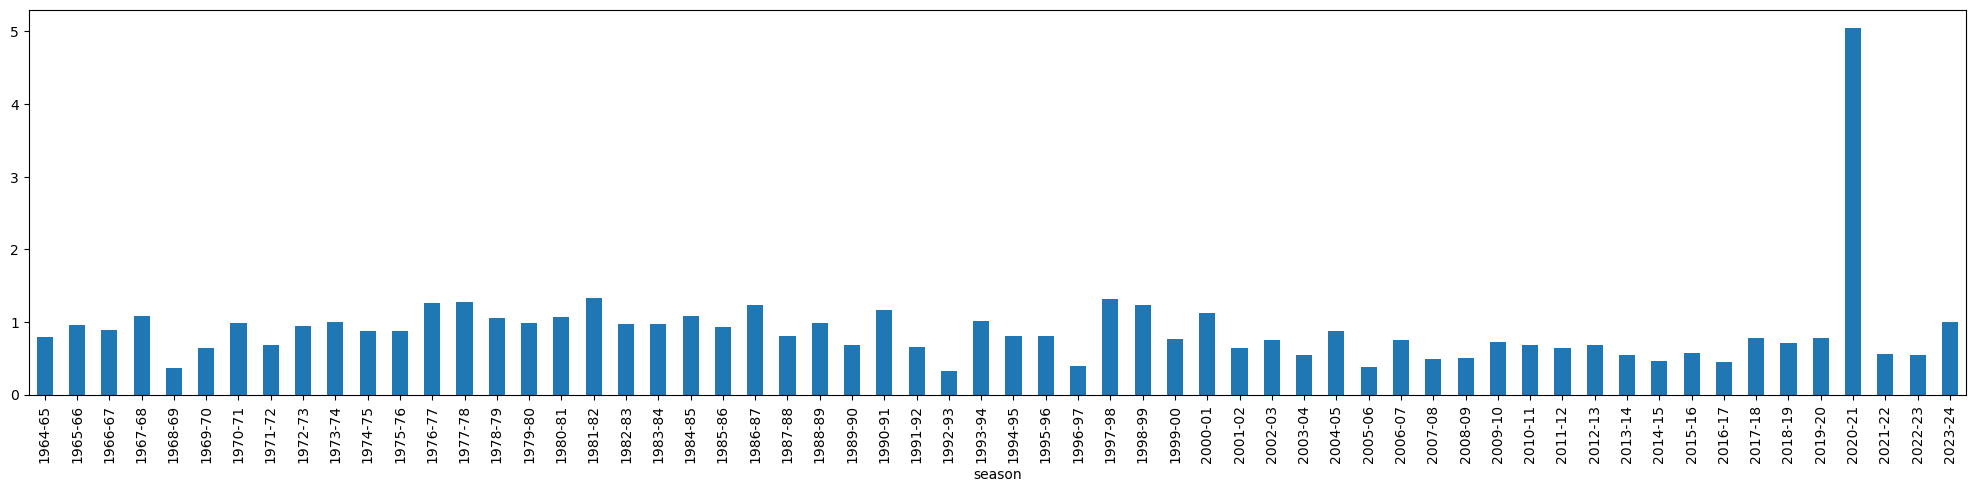

In [696]:
pd.Series(east[(east['remaining_teams_count'] > 2) & (east['remaining_teams_count'] <= 32) & (east['competition'] == 'UCL')].groupby('season')['attendance'].mean() / df[(df['remaining_teams_count'] > 2) & (df['remaining_teams_count'] <= 32) & (df['competition'] == 'UCL')].groupby('season')['attendance'].mean()).tail(60).plot.bar(figsize=(25,5))

In [697]:
east[east['attendance'] == 291333]

,competition,date,score,homeTeam,homeTeamCountry,homeTeamUrl,awayTeam,awayTeamCountry,awayTeamUrl,location,phase,attendance,competitonOriginal,season,city,remaining_teams_count,nazev,dedina


In [698]:
east[east['city'] == 'Lyon']

,competition,date,score,homeTeam,homeTeamCountry,homeTeamUrl,awayTeam,awayTeamCountry,awayTeamUrl,location,phase,attendance,competitonOriginal,season,city,remaining_teams_count,nazev,dedina
939,CWC,1986-05-02,3-0,Dynamo Kyiv,Soviet Union,FC_Dynamo_Kyiv,Atlético Madrid,Spain,Atl%C3%A9tico_Madrid,"Stade de Gerland, Lyon",final,39300.0,1985–86 European Cup Winners' Cup,1985-86,Lyon,2.0,Dynamo,Kyiv


In [699]:
east[east['city'] == 'Bazaly']

,competition,date,score,homeTeam,homeTeamCountry,homeTeamUrl,awayTeam,awayTeamCountry,awayTeamUrl,location,phase,attendance,competitonOriginal,season,city,remaining_teams_count,nazev,dedina
623,CWC,1979-04-25,2-1,Banik Ostrava,Czechoslovakia,Banik_Ostrava,Fortuna Düsseldorf,West Germany,Fortuna_D%C3%BCsseldorf,Bazaly,semi-finals,33000.0,1978–79 European Cup Winners' Cup,1978-79,Bazaly,5.0,Banik,Ostrava


In [700]:
east.groupby('city')['attendance'].median().nlargest(60)

city
Barcelona                   97000.0
Seville                     65000.0
Bari                        51587.0
Chorzow                     48617.0
Germany                     46969.0
Manchester                  43878.0
Odessa                      40887.0
Lyon                        39300.0
Lenin Dinamo Stadium        35000.0
Bazaly                      33000.0
Dresden                     33000.0
Kharkiv                     33000.0
Leningrad                   32000.0
Leipzig                     30800.0
Brussels                    30000.0
Volgograd                   26000.0
Kyiv                        25991.0
Kiev                        25811.5
Donetsk                     25500.0
Kryvyi Rih                  25440.0
Bytom                       25000.0
Magdeburg                   25000.0
Gdańsk                      24697.0
Karl-Marx-Stadt             24300.0
Lviv                        23618.0
Mielec                      23385.0
Split                       22512.0
Craiova                

In [701]:
east.groupby('location')['attendance'].max().nlargest(50)

location
Red Star Stadium, Belgrade                   110000.0
Central Stadium, Kyiv                        102000.0
Olympic Stadium, Kyiv                        100069.0
Republican Stadium, Kyiv                     100067.0
Népstadion, Budapest                         100000.0
Camp Nou, Barcelona                           97000.0
Respublikanskiy Stadium, Kyiv                 93700.0
Lenin Dinamo Stadium, Tbilisi                 90000.0
Stadion Crvena Zvezda, Belgrade               90000.0
Vladimir Lenin Stadium, Tbilisi               90000.0
Marakana, Belgrade                            89806.0
Silesian Stadium, Chorzów                     89089.0
Central Lenin Stadium, Moscow                 86500.0
Stadion Crvena zvezda, Belgrade               85227.0
Central Stadium Vladimir Lenin, Moscow        85000.0
Stadionul August 23, Bucharest                85000.0
Olimpiyskiy National Sports Complex, Kyiv     83200.0
Olimpiyskiy NSC, Kyiv                         82750.0
Zentralstadion, Lei

In [702]:
df[df['season'] >= '2021-22'].groupby('location')['attendance'].median().nlargest(60)

location
Wembley Stadium, London                      86212.0
Westfalenstadion, Dortmund                   81182.5
Camp Nou, Barcelona                          75468.0
Allianz Arena, Munich                        75000.0
Stade de France, Saint-Denis                 75000.0
Old Trafford, Manchester                     73130.0
Atatürk Olympic Stadium, Istanbul            71412.0
San Siro, Milan                              71368.0
Metropolitano Stadium, Madrid                63423.5
Estádio do Sport Lisboa e Benfica, Lisbon    62594.0
Santiago Bernabéu, Madrid                    62271.5
Wanda Metropolitano Stadium, Madrid          60725.0
Stade Vélodrome, Marseille                   60141.5
Emirates Stadium, London                     59929.0
Olympic Stadium, Athens                      57003.0
Puskás Aréna, Budapest                       56075.5
Celtic Park, Glasgow                         55640.0
Tottenham Hotspur Stadium, London            55180.0
Estádio da Luz, Lisbon               

In [703]:
df[df['season'] > '2013-14'].groupby('awayTeam')['attendance'].median().nlargest(60)

awayTeam
Newcastle United            65695.0
Brighton & Hove Albion      57780.0
Paris Saint-Germain         49333.0
Barcelona                   47470.0
Inter Milan                 47443.5
Real Madrid                 46585.0
Oostende                    46519.0
Manchester City             44855.5
Bayern Munich               44510.0
Juventus                    42186.0
Dinamo București            41845.0
Liverpool                   39186.5
Valencia                    39070.0
Atlético Madrid             37447.0
RB Leipzig                  37351.5
Porto                       36919.0
Rostov                      36896.0
Chelsea                     35127.0
Borussia Dortmund           34598.0
Lens                        34055.5
Benfica                     33815.0
CSKA Moscow                 33651.5
Utrecht                     33446.0
Arsenal                     33228.0
Celta Vigo                  33117.0
Toulouse                    32719.0
Napoli                      32391.0
SC Freiburg        

In [704]:
east[(east['remaining_teams_count'] > 2) & (east['remaining_teams_count'] <= 32) & (east['competition'] == 'UCL')].groupby('season')['attendance'].mean()

season
1955-56    30000.000000
1956-57    38000.000000
1957-58    37750.000000
1958-59    24166.666667
1959-60    43125.000000
               ...     
2019-20    31405.208333
2020-21     6756.590909
2021-22    19505.400000
2022-23    26833.923077
2023-24    52031.769231
Name: attendance, Length: 69, dtype: float64

## A potential plot twist: is there _more_ European-level soccer in the East after all?

In [705]:
east['competition'].drop_duplicates()

0         CWC
1996       EL
17518     UCL
25800    UECL
Name: competition, dtype: object

<Axes: xlabel='season'>

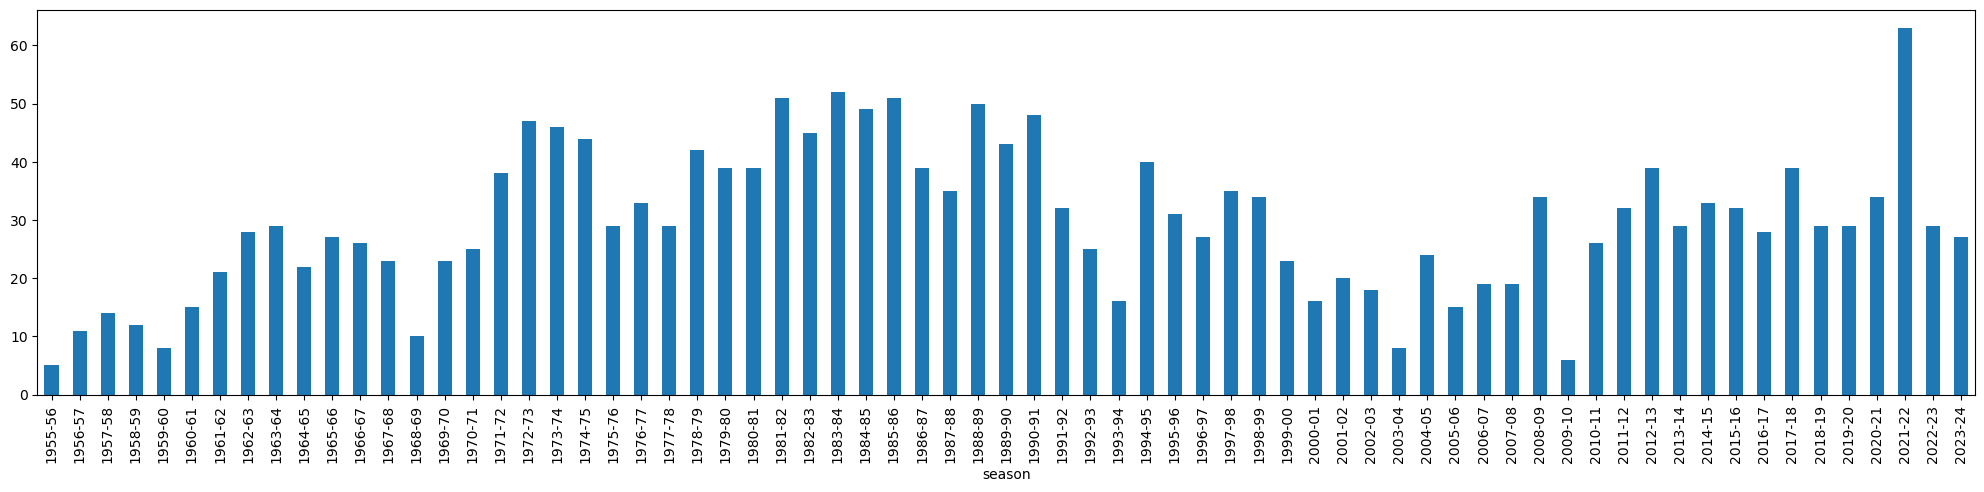

In [706]:
east[east['remaining_teams_count'] <= 32].groupby('season').size().plot.bar(figsize=(25,5))

In [707]:
top4 = df[df['competition'] == 'UCL'].groupby('homeTeam').size().nlargest(4).index.to_list()
top4

['Real Madrid', 'Bayern Munich', 'Barcelona', 'Juventus']

In [708]:
df[df['homeTeam'].str.contains('Manchester',na=False)].groupby('homeTeam').size()

homeTeam
Manchester City       96
Manchester United    200
dtype: int64

In [709]:
top8 = ['Real Madrid','Milan','Inter Milan','Bayern Munich','Bayern Münich','FC Bayern Munich','Liverpool','Barcelona','FC Barcelona','Ajax','Manchester United']

In [710]:
allseasons = df[df['competition'] == 'UCL']['season'].drop_duplicates().to_list()

## Best EE clubs after 1990

In [711]:
east[(east['competition'] == 'UCL') & (east['season'] >= '1990-91')].groupby('homeTeam')['remaining_teams_count'].min().nsmallest(20)

homeTeam
Red Star Belgrade          2.0
Dynamo Kyiv                4.0
RB Leipzig                 4.0
Spartak Moscow             4.0
CSKA Moscow                8.0
Dynamo Dresden             8.0
Hajduk Split               8.0
Shakhtar Donetsk           8.0
Sparta Prague              8.0
CSKA Sofia                16.0
Dinamo București          16.0
Lech Poznań               16.0
Lokomotiv Moscow          16.0
Steaua București          16.0
Widzew Łódź               16.0
Zenit Saint Petersburg    16.0
Ferencváros               17.0
Legia Warsaw              17.0
Croatia Zagreb            24.0
Košice                    24.0
Name: remaining_teams_count, dtype: float64

In [712]:
east[(east['competition'] == 'EL') & (east['season'] >= '1990-91')].groupby('homeTeam')['remaining_teams_count'].min().nsmallest(20)

homeTeam
Dnipro Dnipropetrovsk      2.0
Shakhtar Donetsk           2.0
Zenit Saint Petersburg     2.0
CSKA Moscow                4.0
Dynamo Kyiv                4.0
RB Leipzig                 4.0
Slavia Prague              4.0
Steaua București           4.0
Spartak Moscow             5.0
Dinamo Zagreb              8.0
Metalist Kharkiv           8.0
Rubin Kazan                8.0
Sigma Olomouc              8.0
Slovan Liberec             8.0
Sparta Prague              8.0
Torpedo Moscow             8.0
Levski Sofia               9.0
Rapid București            9.0
Anzhi Makhachkala         16.0
Dynamo Moscow             16.0
Name: remaining_teams_count, dtype: float64

In [713]:
east[(east['competition'] == 'UECL') & (east['season'] >= '1990-91')].groupby('homeTeam')['remaining_teams_count'].min().nsmallest(20)

homeTeam
Lech Poznań            8.0
Viktoria Plzeň         8.0
Dinamo Zagreb         16.0
Sheriff Tiraspol      16.0
Slovan Bratislava     16.0
CFR Cluj              24.0
Dnipro-1              24.0
Ferencváros           24.0
Legia Warsaw          24.0
Ludogorets Razgrad    24.0
Partizan              24.0
Qarabağ               24.0
Alashkert             32.0
CSKA Sofia            32.0
Flora                 32.0
Jablonec              32.0
Kairat                32.0
Mura                  32.0
Slavia Prague         32.0
Union Berlin          32.0
Name: remaining_teams_count, dtype: float64

## Charts

In [714]:
def irozhlas_graf(
    carovy=[],
    sloupcovy=[],
    vodorovny=[],
    procenta=[],
    skryte=[],
    barvy=[],
    histogram=False,
    max_procenta=100,
    target="",
    titulek="",
    podtitulek="",
    naproti = [],
    osay=" ",
    osay2=" ",
    osaymin=None,
    osaymax=None,
    kredity=["zdroj dat a autorstvo", "url odkazu"],
    zaokrouhleni=1,
    prvni=True,
    skladany=False,
    naopak=False,
    vzhurunohama=False,
    skrytnuly=False,
):
    """
    Funkce vygeneruje HighCharts graf z pandas Series (jedné nebo více).

    iROZHLAS-friendly barvy:
    - "#b2e061" světle zelená
    - "#7eb0d5" světle modrá
    - "#fd7f6f" světle červená
    - "#bd7ebe" světle fialová
    - "#ffb55a" oranžová
    - "#ffee65" žlutá
    - "#beb9db" levandulová
    - "#fdcce5" skoro černá
    - "#8bd3c7" světle tyrkysová
    """

    import os
    import pandas as pd
    from highcharts_core.chart import Chart
    from highcharts_core.options.series.area import LineSeries
    from highcharts_core.options.series.bar import ColumnSeries
    from highcharts_core.options.series.bar import BarSeries
    from highcharts_core.options.series.histogram import HistogramSeries
    from highcharts_core.options.legend import Legend
    from highcharts_core.options.title import Title
    from highcharts_core.options.subtitle import Subtitle
    from highcharts_core.options.credits import Credits

    nastaveni = {}

    if prvni:
        zdrojaky = f"""<script src="https://code.highcharts.com/highcharts.js"></script><style type="text/css">text{{font-family:"Asap"!important}}.paragraph{{font-family:"Noticia text"!important}}.href{{color:#666;fill:#666}}.highcharts-title{{font-family:"Noticia text"!important;font-weight:700!important;text-align:left!important;left:10px!important}}.highcharts-subtitle{{text-align:left!important;font-size:.95rem!important;left:10px!important;font-family:"Asap"!important}}.highcharts-data-labels text{{font-size:.85rem!important}}.highcharts-axis-labels text{{font-size:.85rem!important}}text.highcharts-plot-line-label{{font-size:.85rem!important;fill:#666}}text.highcharts-plot-band-label{{font-size:.85rem!important;fill:#666}}text.highcharts-credits{{font-size:.75rem!important}}.highcharts-tooltip span{{font-family:"Asap"!important}}.axis-label-on-tick{{fill:#aaa;color:#aaa}}.mock-empty-line{{fill:#fff;color:#fff}}</style>"""
    else:
        zdrojaky = ""

    pred = f"""{zdrojaky}
        <figure id="{target}">
        <div id="container"></div>
        </figure>
        <script>"""

    if len(carovy) > 0:
        categories = carovy[0].index.to_list()
    if len(sloupcovy) > 0:
        categories = sloupcovy[0].index.to_list()
    if len(vodorovny) > 0:
        categories = vodorovny[0].index.to_list()

    categories = [str(x) for x in categories]

    nastaveni["xAxis"] = {"categories": categories, "min": 0}
    nastaveni["yAxis"] = [
        {
            "title": {"text": osay},
            "reversed": vzhurunohama,
            "max": osaymax,
            "min": osaymin,
        }
    ]

    if skladany:
        if len(sloupcovy) > 0:
            nastaveni["plotOptions"] = {"column": {"stacking": "normal"}}
        if len(vodorovny) > 0:
            nastaveni["plotOptions"] = {"bar": {"stacking": "normal"}}
    if histogram:
        nastaveni["plotOptions"] = {
            "column": {
                "pointPadding": 0,
                "borderWidth": 0,
                "groupPadding": 0,
                "shadow": False,
            }
        }

    if len(procenta) > 0:
        osa_procent = {
            "title": {"text": osay2},
            "max": max_procenta,
            "min": 0,
            "labels": {"format": "{value} %"},
        }

        if len(procenta) != len(carovy) + len(sloupcovy):
            osa_procent["opposite"] = True
            druha_osa = 1
            nastaveni["yAxis"].append(osa_procent)
            nastaveni["alignTicks"] = False
        if len(procenta) == len(carovy) + len(sloupcovy):
            nastaveni["yAxis"] = [osa_procent]
            druha_osa = 0
            
    if len(naproti) > 0:
        druha_osa = 1
        druha_osa_y =  {
            "title": {"text": osay2},
            "opposite": True,
            "max": naproti[0].max(),
            "min": 0
        }
        nastaveni["yAxis"].append(druha_osa_y)

    my_chart = Chart(container=target, options=nastaveni)

    procenta = [p.name for p in procenta]
    naproti = [n.name for n in naproti]
    skryte = [s.name for s in skryte]

    def vykresleni(serie, typ):
        for s in serie:
            popisek = s.name

            if s.name in skryte:
                viditelnost = False
            else:
                viditelnost = True

            ktera_osa = 0
            if s.name in naproti:
                ktera_osa = druha_osa
                
            if s.name in procenta:
                s = [round(x * 100, zaokrouhleni) for x in s.fillna(0).to_list()]
                my_chart.add_series(
                    typ(
                        data=s,
                        visible=viditelnost,
                        name=popisek,
                        y_axis=druha_osa,
                        tooltip={"valueSuffix": " %"},
                    )
                )
                    
            else:
                my_chart.add_series(
                    typ(
                        data=s.fillna(0).to_list(),
                        visible=viditelnost,
                        name=popisek,
                        y_axis=ktera_osa,
                    )
                )

    if len(sloupcovy) > 0:
        vykresleni(sloupcovy, ColumnSeries)
    if len(carovy) > 0:
        vykresleni(carovy, LineSeries)
    if len(vodorovny) > 0:
        vykresleni(vodorovny, BarSeries)

    if len(barvy) > 0:
        my_chart.options.colors = barvy
    else:
        my_chart.options.colors = colors = [
            "#b2e061",  ## světle zelená (light green)
            "#7eb0d5",  ## světle modrá (light blue)
            "#fd7f6f",  ## světle červená (light red)
            "#bd7ebe",  ## světle fialová (light purple)
            "#ffb55a",  ## oranžová (orange)
            "#ffee65",  ## žlutá (yellow)
            "#beb9db",  ## levandulová (lavender)
            "#fdcce5",  ## skoro černá
            "#8bd3c7",  ## světle tyrkysová (light turquoise)
        ]

    if naopak:
        my_chart.options.legend = Legend(reversed=True)

    my_chart.options.title = Title(text=titulek, align="left", margin=30)

    if len(podtitulek) > 0:
        my_chart.options.subtitle = Subtitle(text=podtitulek, align="left")

    my_chart.options.credits = Credits(text=kredity[0], enabled=True, href=kredity[1])

    as_js_literal = my_chart.to_js_literal()

    if skrytnuly == True:
        as_js_literal = as_js_literal.replace("y: 0.0", "y: null")

    code = f"<html><head><title>{titulek}</title></head><body>{pred}{as_js_literal}</script></body></html>"

    if not os.path.exists("grafy"):
        os.mkdir("grafy")

    with open(os.path.join("grafy", target + ".html"), "w+") as f:
        f.write(code)

    with open(os.path.join("grafy", target + ".txt"), "w+") as f:
        f.write(f"{pred}{as_js_literal}</script>")

        print("Graf uložen.")

In [715]:
ligamistru = pd.Series(east[(east['competition'] == 'UCL') & (east['remaining_teams_count'] <= 8)].groupby('season')['homeTeam'].nunique().reindex(allseasons), name="PMEZ / Liga mistrů")
uefa = pd.Series(east[(east['competition'] == 'EL') & (east['remaining_teams_count'] <= 8)].groupby('season')['homeTeam'].nunique().reindex(allseasons), name="Pohár UEFA / EL")
pvp = pd.Series(east[(east['competition'] == 'CWC') & (east['remaining_teams_count'] <= 8)].groupby('season')['homeTeam'].nunique().reindex(allseasons), name="Pohár vítězů pohárů")
uecl = pd.Series(east[(east['competition'] == 'UECL') & (east['remaining_teams_count'] <= 8)].groupby('season')['homeTeam'].nunique().reindex(allseasons), name="Konfederační liga")

In [716]:
podpis = ['Vizualizace: Samizdat, datový tým Českého rozhlasu','https://www.irozhlas.cz/zpravy-tag/datova-zurnalistika']

In [736]:
east[east['homeTeam'].str.contains('namo',na=False)].groupby('homeTeam').size().nlargest(50)

homeTeam
Dynamo Kyiv         209
Dinamo Zagreb       146
Dinamo București     87
Dinamo Tbilisi       83
Dinamo Minsk         68
Dynamo Dresden       46
Dynamo Moscow        46
BFC Dynamo           30
Dinamo Tirana        19
Dynamo Brest          6
Dinamo-93 Minsk       3
Dynamo Kiev           3
Dinamo Brest          2
Dynamo Žilina         2
Dinamo Bucharest      1
Dynamo Baku           1
dtype: int64

In [717]:
east[(east['remaining_teams_count'] <= 8)].groupby('homeTeam')['season'].nunique().nlargest(10)

homeTeam
Dynamo Kyiv          15
Red Star Belgrade    12
Dynamo Dresden        8
Sparta Prague         8
Spartak Moscow        8
Steaua București      7
Dukla Prague          6
Hajduk Split          6
Dynamo Moscow         5
Shakhtar Donetsk      5
Name: season, dtype: int64

In [718]:
east[(east['remaining_teams_count'] <= 8)].groupby('homeTeam')['date'].max().nlargest(10)

homeTeam
Viktoria Plzeň           2024-04-11
Lech Poznań              2023-04-13
RB Leipzig               2022-04-28
Slavia Prague            2021-04-15
Dinamo Zagreb            2021-04-08
Shakhtar Donetsk         2020-08-11
CSKA Moscow              2018-04-12
Sparta Prague            2016-04-14
Dnipro Dnipropetrovsk    2015-05-27
Zenit Saint Petersburg   2015-04-23
Name: date, dtype: datetime64[ns]

In [719]:
east[east['date'] == '2016-04-14']

,competition,date,score,homeTeam,homeTeamCountry,homeTeamUrl,awayTeam,awayTeamCountry,awayTeamUrl,location,phase,attendance,competitonOriginal,season,city,remaining_teams_count,nazev,dedina
12197,EL,2016-04-14,2-4,Sparta Prague,Czech Republic,NaN,Villarreal,Spain,NaN,"Generali Arena, Prague",quarter-finals,18201.0,2015–16 UEFA Europa League knockout phase,2015-16,Prague,8.0,Sparta,Prague
12198,EL,2016-04-14,4-0,Shakhtar Donetsk,Ukraine,NaN,Braga,Portugal,NaN,"Arena Lviv, Lviv",quarter-finals,33617.0,2015–16 UEFA Europa League knockout phase,2015-16,Lviv,8.0,Shakhtar,Donetsk


In [807]:
irozhlas_graf(sloupcovy=[ligamistru, uefa, pvp, uecl], skladany=True, target="ctvrtfinale", kredity=podpis, titulek="Východoevropské kluby mezi 8 nejlepšími v evropských pohárech", podtitulek='Do nejvíce čtvrtfinále (či odpovídající skupinové fáze) evropských soutěží se podívalo Dynamo Kyjev, v 15 sezonách. Druhá je Rudá hvězda Bělehrad a na střetím sdíleném místě s 8 takto úspěšnými sezonami Dynamo Drážďany, Spartak Moskva a Sparta Praha. Ta naposledy hrála čtvrtfinále Evropské ligy na jaře 2016, vyřadil ji v něm Villarreal.', barvy=["#fd7f6f","#7eb0d5","#b2e061","#ffee65"])

Graf uložen.


In [721]:
east.groupby('homeTeam')['date'].nunique().nlargest(10)

homeTeam
Dynamo Kyiv          209
Red Star Belgrade    176
Sparta Prague        154
Partizan             148
Steaua București     148
Dinamo Zagreb        146
Shakhtar Donetsk     139
Spartak Moscow       132
Legia Warsaw         123
Slavia Prague        110
Name: date, dtype: int64

In [722]:
east[east['awayTeam'].isin(top8)].groupby('homeTeam')['date'].nunique().nlargest(10)

homeTeam
Dynamo Kyiv          23
Spartak Moscow       17
Sparta Prague        16
Red Star Belgrade    15
Shakhtar Donetsk     15
Steaua București     10
CSKA Moscow           8
Dinamo Zagreb         8
Legia Warsaw          8
CSKA Sofia            7
Name: date, dtype: int64

In [811]:
df[df['homeTeam'] == 'Dynamo Kyiv'].tail(10)

,competition,date,score,homeTeam,homeTeamCountry,homeTeamUrl,awayTeam,awayTeamCountry,awayTeamUrl,location,phase,attendance,competitonOriginal,season,city,remaining_teams_count,nazev,dedina
25114,UCL,2021-09-14,0-0,Dynamo Kyiv,Ukraine,FC_Dynamo_Kyiv,Benfica,Portugal,S.L._Benfica,"NSC Olimpiyskiy, Kyiv",groups,21657.0,2021–22 UEFA Champions League group stage,2021-22,Kyiv,32.0,Dynamo,Kyiv
25157,UCL,2021-11-02,0-1,Dynamo Kyiv,Ukraine,FC_Dynamo_Kyiv,Barcelona,Spain,FC_Barcelona,"NSC Olimpiyskiy, Kyiv",groups,31378.0,2021–22 UEFA Champions League group stage,2021-22,Kyiv,32.0,Dynamo,Kyiv
25178,UCL,2021-11-23,1-2,Dynamo Kyiv,Ukraine,FC_Dynamo_Kyiv,Bayern Munich,Germany,FC_Bayern_Munich,"NSC Olimpiyskiy, Kyiv",groups,28732.0,2021–22 UEFA Champions League group stage,2021-22,Kyiv,32.0,Dynamo,Kyiv
25425,UCL,2022-08-17,0-2,Dynamo Kyiv,Ukraine,FC_Dynamo_Kyiv,Benfica,Portugal,S.L._Benfica,"Stadion Miejski im. Władysława Króla, Łódź, Po...",play-off round,16450.0,2022–23 UEFA Champions League qualifying phase...,2022-23,Poland,38.0,Dynamo,Kyiv
25471,UCL,2022-07-20,0-0,Dynamo Kyiv,Ukraine,FC_Dynamo_Kyiv,Fenerbahçe,Turkey,Fenerbah%C3%A7e_S.K._(football),"Stadion Miejski im. Władysława Króla, Łódź, Po...",second qualifying round,11603.0,2022–23 UEFA Champions League qualifying phase...,2022-23,Poland,60.0,Dynamo,Kyiv
25493,UCL,2022-08-03,1-0,Dynamo Kyiv,Ukraine,FC_Dynamo_Kyiv,Sturm Graz,Austria,SK_Sturm_Graz,"Stadion Miejski im. Władysława Króla, Łódź, Po...",third qualifying round,6092.0,2022–23 UEFA Champions League qualifying phase...,2022-23,Poland,48.0,Dynamo,Kyiv
25752,UCL,2024-07-23,6-2,Dynamo Kyiv,Ukraine,FC_Dynamo_Kyiv,Partizan,Serbia,FK_Partizan,"Arena Lublin, Lublin, Poland",second qualifying round,4712.0,2024–25 UEFA Champions League qualifying phase...,2024-25,Poland,NaN,Dynamo,Kyiv
25784,UCL,2024-08-06,v,Dynamo Kyiv,Ukraine,FC_Dynamo_Kyiv,Rangers,Scotland,Rangers_F.C.,"Arena Lublin, Lublin, Poland",third qualifying round,NaN,2024–25 UEFA Champions League qualifying phase...,2024-25,Poland,NaN,Dynamo,Kyiv
26738,UECL,2023-08-24,2-3,Dynamo Kyiv,Ukraine,FC_Dynamo_Kyiv,Beşiktaş,Turkey,Be%C5%9Fikta%C5%9F_J.K.,"Stadionul Rapid-Giulești, Bucharest, Romania",play-off round,NaN,2023–24 UEFA Europa Conference League qualifyi...,2023-24,Romania,62.0,Dynamo,Kyiv
26945,UECL,2023-08-17,2-1 (a.e.t.),Dynamo Kyiv,Ukraine,NaN,Aris,Greece,NaN,"Stadionul Rapid-Giulești, Bucharest, Romania",third qualifying round,4461.0,2023–24 UEFA Europa Conference League qualifyi...,2023-24,Romania,94.0,Dynamo,Kyiv


In [723]:
dobryfotbal = pd.Series(east[east['awayTeam'].isin(top8)].groupby('season')['homeTeam'].nunique().reindex(allseasons[:-1]), name="proti Realu, Interu, AC Milán, Bayernu, Liverpoolu, Barceloně, Ajaxu a Manchasteru United")

<Axes: xlabel='season'>

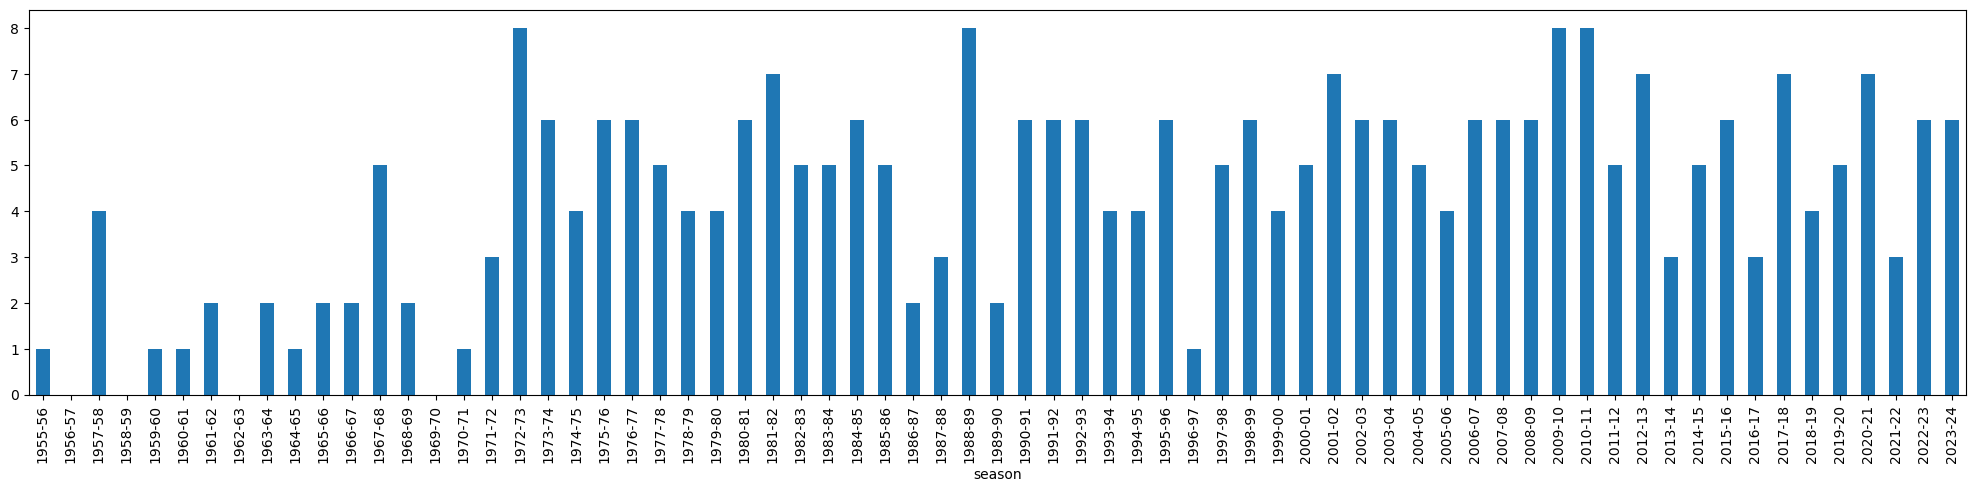

In [724]:
dobryfotbal.plot.bar(figsize=(25,5))

In [725]:
vsechenfotbal = pd.Series(east.groupby('season').size().reindex(allseasons[:-1]), name="všechna utkání")

<Axes: xlabel='season'>

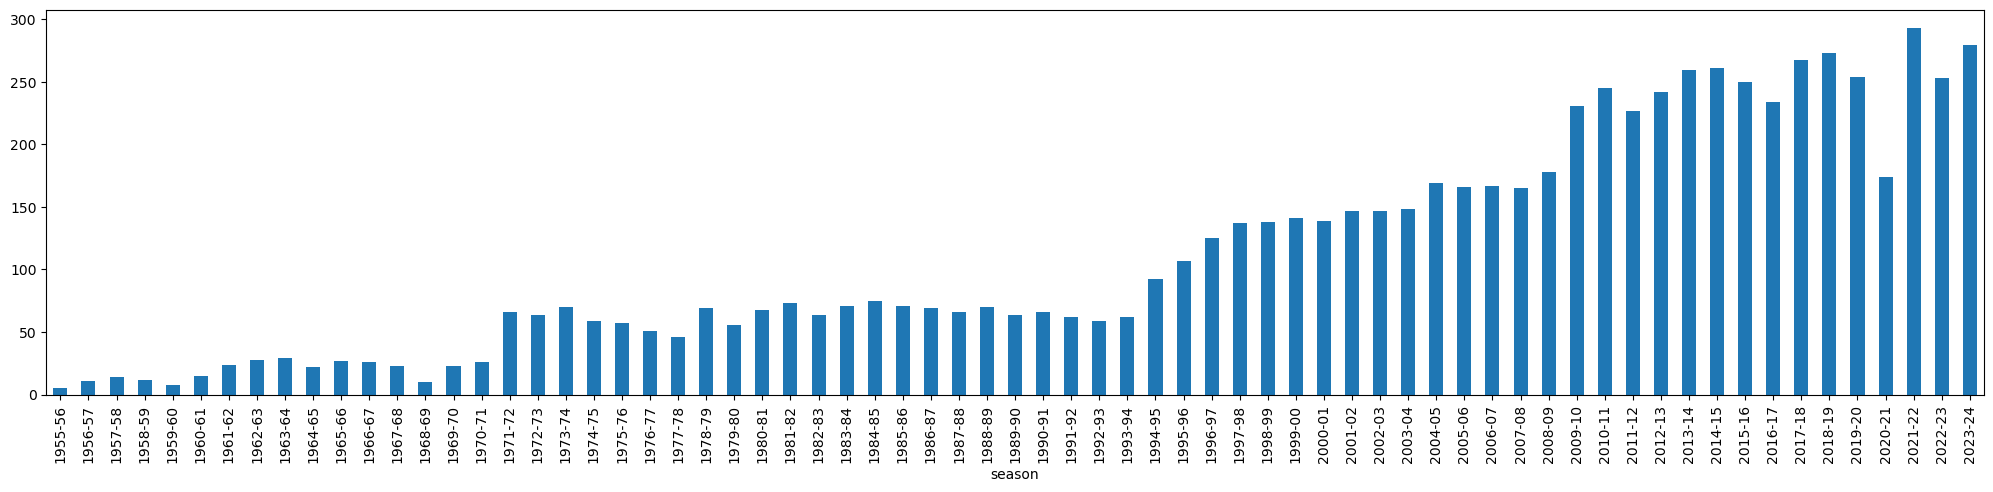

In [726]:
vsechenfotbal.plot.bar(figsize=(25,5))

In [813]:
irozhlas_graf(sloupcovy=[dobryfotbal], carovy=[vsechenfotbal], naproti = [dobryfotbal], osay="Celkem utkání", osay2="Utkání s top 8 týmy", target="vsecko", kredity=podpis, titulek="Domácí utkání východoevropských klubů ve všech kolech i předkolech evropských pohárů", barvy=["#ffee65","#fd7f6f"])

Graf uložen.
